In [26]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [27]:
# Read in daily ridership data
file_path = os.path.join('..','assets', 'MTA_Daily_Ridership_Data__Beginning_2020_20241001.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Read in hourly bus ridership data
bus_file_path = os.path.join('..', 'assets', 'hourly_bus_ridership.csv')
hourly_bus_df = pd.read_csv(bus_file_path)

# Read in hourly subway ridership data
subway_file_path = os.path.join('..', 'assets', 'hourly_subway_ridership.csv')
hourly_subway_df = pd.read_csv(subway_file_path)

# Convert 'hour' column to datetime for both datasets
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour'])
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour'])

# Display the first few rows of each dataset
print("Hourly Bus Ridership Data:")
print(hourly_bus_df.head())
print("\nHourly Subway Ridership Data:")
print(hourly_subway_df.head())



Hourly Bus Ridership Data:
                        hour  total_ridership
0  2022-02-01 19:00:00-05:00      4910.510998
1  2022-02-01 20:00:00-05:00      1845.069004
2  2022-02-01 21:00:00-05:00      1012.700000
3  2022-02-01 22:00:00-05:00      1494.125002
4  2022-02-01 23:00:00-05:00      5635.072002

Hourly Subway Ridership Data:
                        hour  total_ridership
0  2022-01-31 19:00:00-05:00          11334.0
1  2022-01-31 20:00:00-05:00           3786.0
2  2022-01-31 21:00:00-05:00           2732.0
3  2022-01-31 22:00:00-05:00           3503.0
4  2022-01-31 23:00:00-05:00          12289.0


In [28]:
import pytz
from datetime import timedelta

# For bus data
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour'], utc=True)
hourly_bus_df['hour'] = hourly_bus_df['hour'].dt.tz_convert('America/New_York')
daily_bus_df = hourly_bus_df.set_index('hour').resample('D', offset=timedelta(hours=4)).sum().reset_index()
daily_bus_df['hour'] = daily_bus_df['hour'].dt.tz_localize(None)
daily_bus_df = daily_bus_df.rename(columns={'hour': 'Date'})

# For subway data
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour'], utc=True)
hourly_subway_df['hour'] = hourly_subway_df['hour'].dt.tz_convert('America/New_York')
daily_subway_df = hourly_subway_df.set_index('hour').resample('D', offset=timedelta(hours=4)).sum().reset_index()
daily_subway_df['hour'] = daily_subway_df['hour'].dt.tz_localize(None)
daily_subway_df = daily_subway_df.rename(columns={'hour': 'Date'})


# Display the first few rows of each dataset
print("Daily Bus Ridership Data:")
print(daily_bus_df.head())
print("\nDaily Subway Ridership Data:")
print(daily_subway_df.head())

# Optionally, you can compare with the original daily data
print("\nOriginal Daily Data:")
print(df[['Date', 'Subways: Total Estimated Ridership', 'Buses: Total Estimated Ridership']].head())

# Calculate and print the total ridership for each dataset
print("\nTotal Ridership Comparison:")
print(f"Bus (from hourly data): {daily_bus_df['total_ridership'].sum():,}")
print(f"Subway (from hourly data): {daily_subway_df['total_ridership'].sum():,}")
print(f"Bus (from daily data): {df['Buses: Total Estimated Ridership'].sum():,}")
print(f"Subway (from daily data): {df['Subways: Total Estimated Ridership'].sum():,}")


Daily Bus Ridership Data:
                 Date  total_ridership
0 2022-02-01 04:00:00     2.990847e+05
1 2022-02-02 04:00:00     1.086627e+06
2 2022-02-03 04:00:00     1.035642e+06
3 2022-02-04 04:00:00     7.549212e+05
4 2022-02-05 04:00:00     5.300866e+05

Daily Subway Ridership Data:
                 Date  total_ridership
0 2022-01-31 04:00:00         492267.0
1 2022-02-01 04:00:00        2015745.0
2 2022-02-02 04:00:00        2203897.0
3 2022-02-03 04:00:00        2125717.0
4 2022-02-04 04:00:00        1640880.0

Original Daily Data:
         Date  Subways: Total Estimated Ridership  \
0  03/01/2020                             2212965   
1  03/02/2020                             5329915   
2  03/03/2020                             5481103   
3  03/04/2020                             5498809   
4  03/05/2020                             5496453   

   Buses: Total Estimated Ridership  
0                            984908  
1                           2209066  
2                    

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/144115184.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


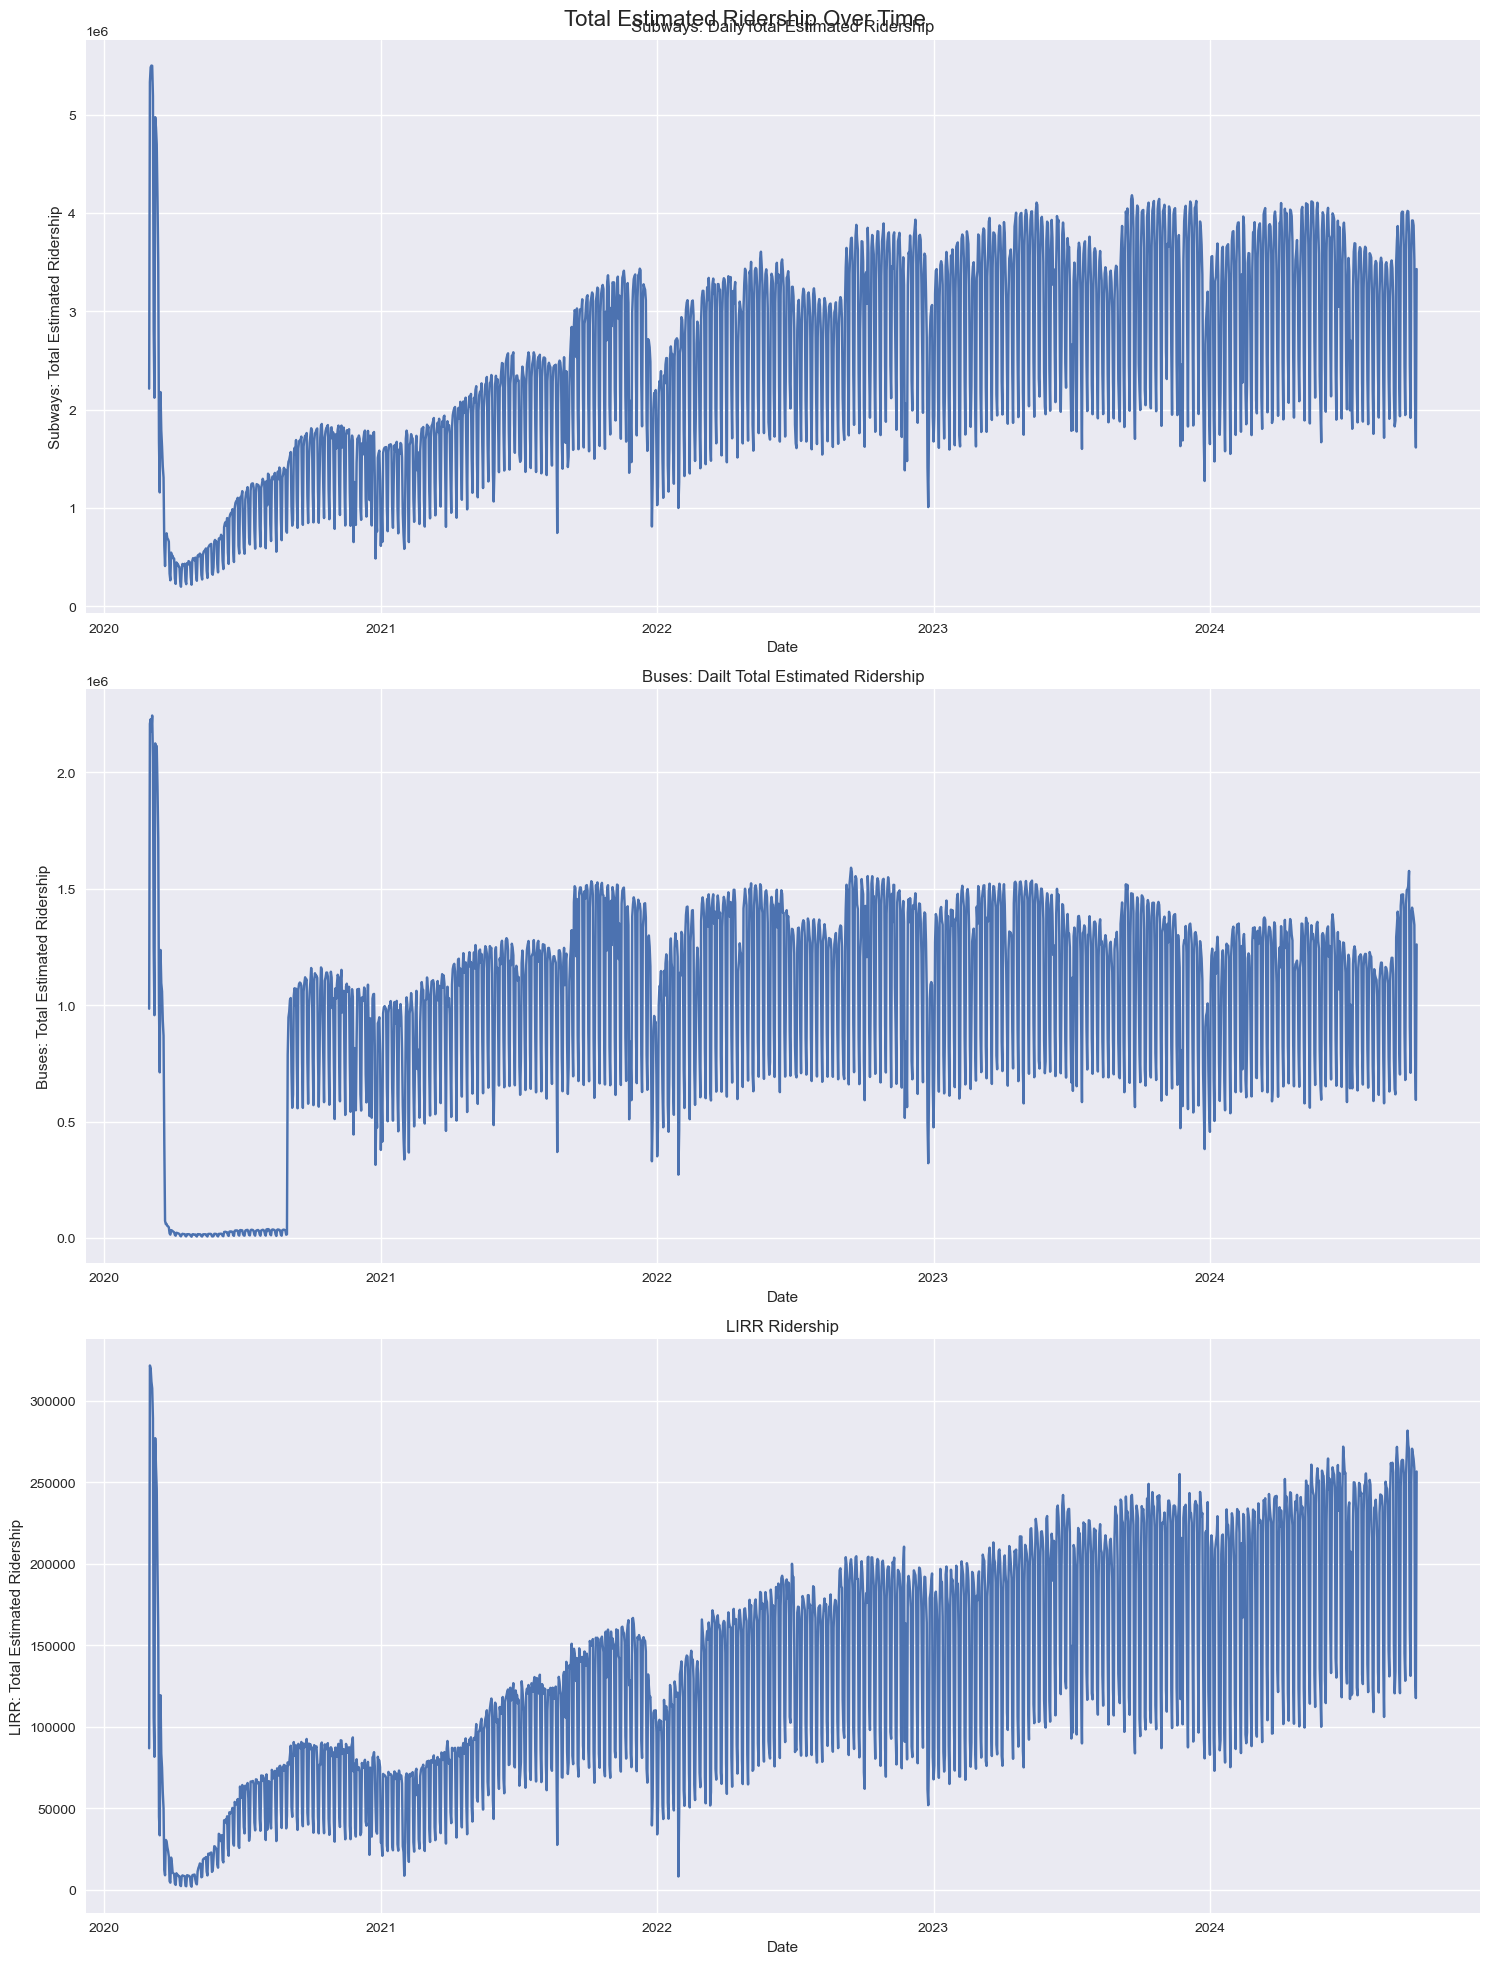

In [29]:


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle('Total Estimated Ridership Over Time', fontsize=16)

# Plot for Bus
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0])
axs[0].set_title('Subways: DailyTotal Estimated Ridership')
axs[0].set_xlabel('Date')

# Plot for Subway
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[1])
axs[1].set_title('Buses: Dailt Total Estimated Ridership')
axs[1].set_xlabel('Date')

# Plot for LIRR
sns.lineplot(x='Date', y='LIRR: Total Estimated Ridership', data=df, ax=axs[2])
axs[2].set_title('LIRR Ridership')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/3445591482.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


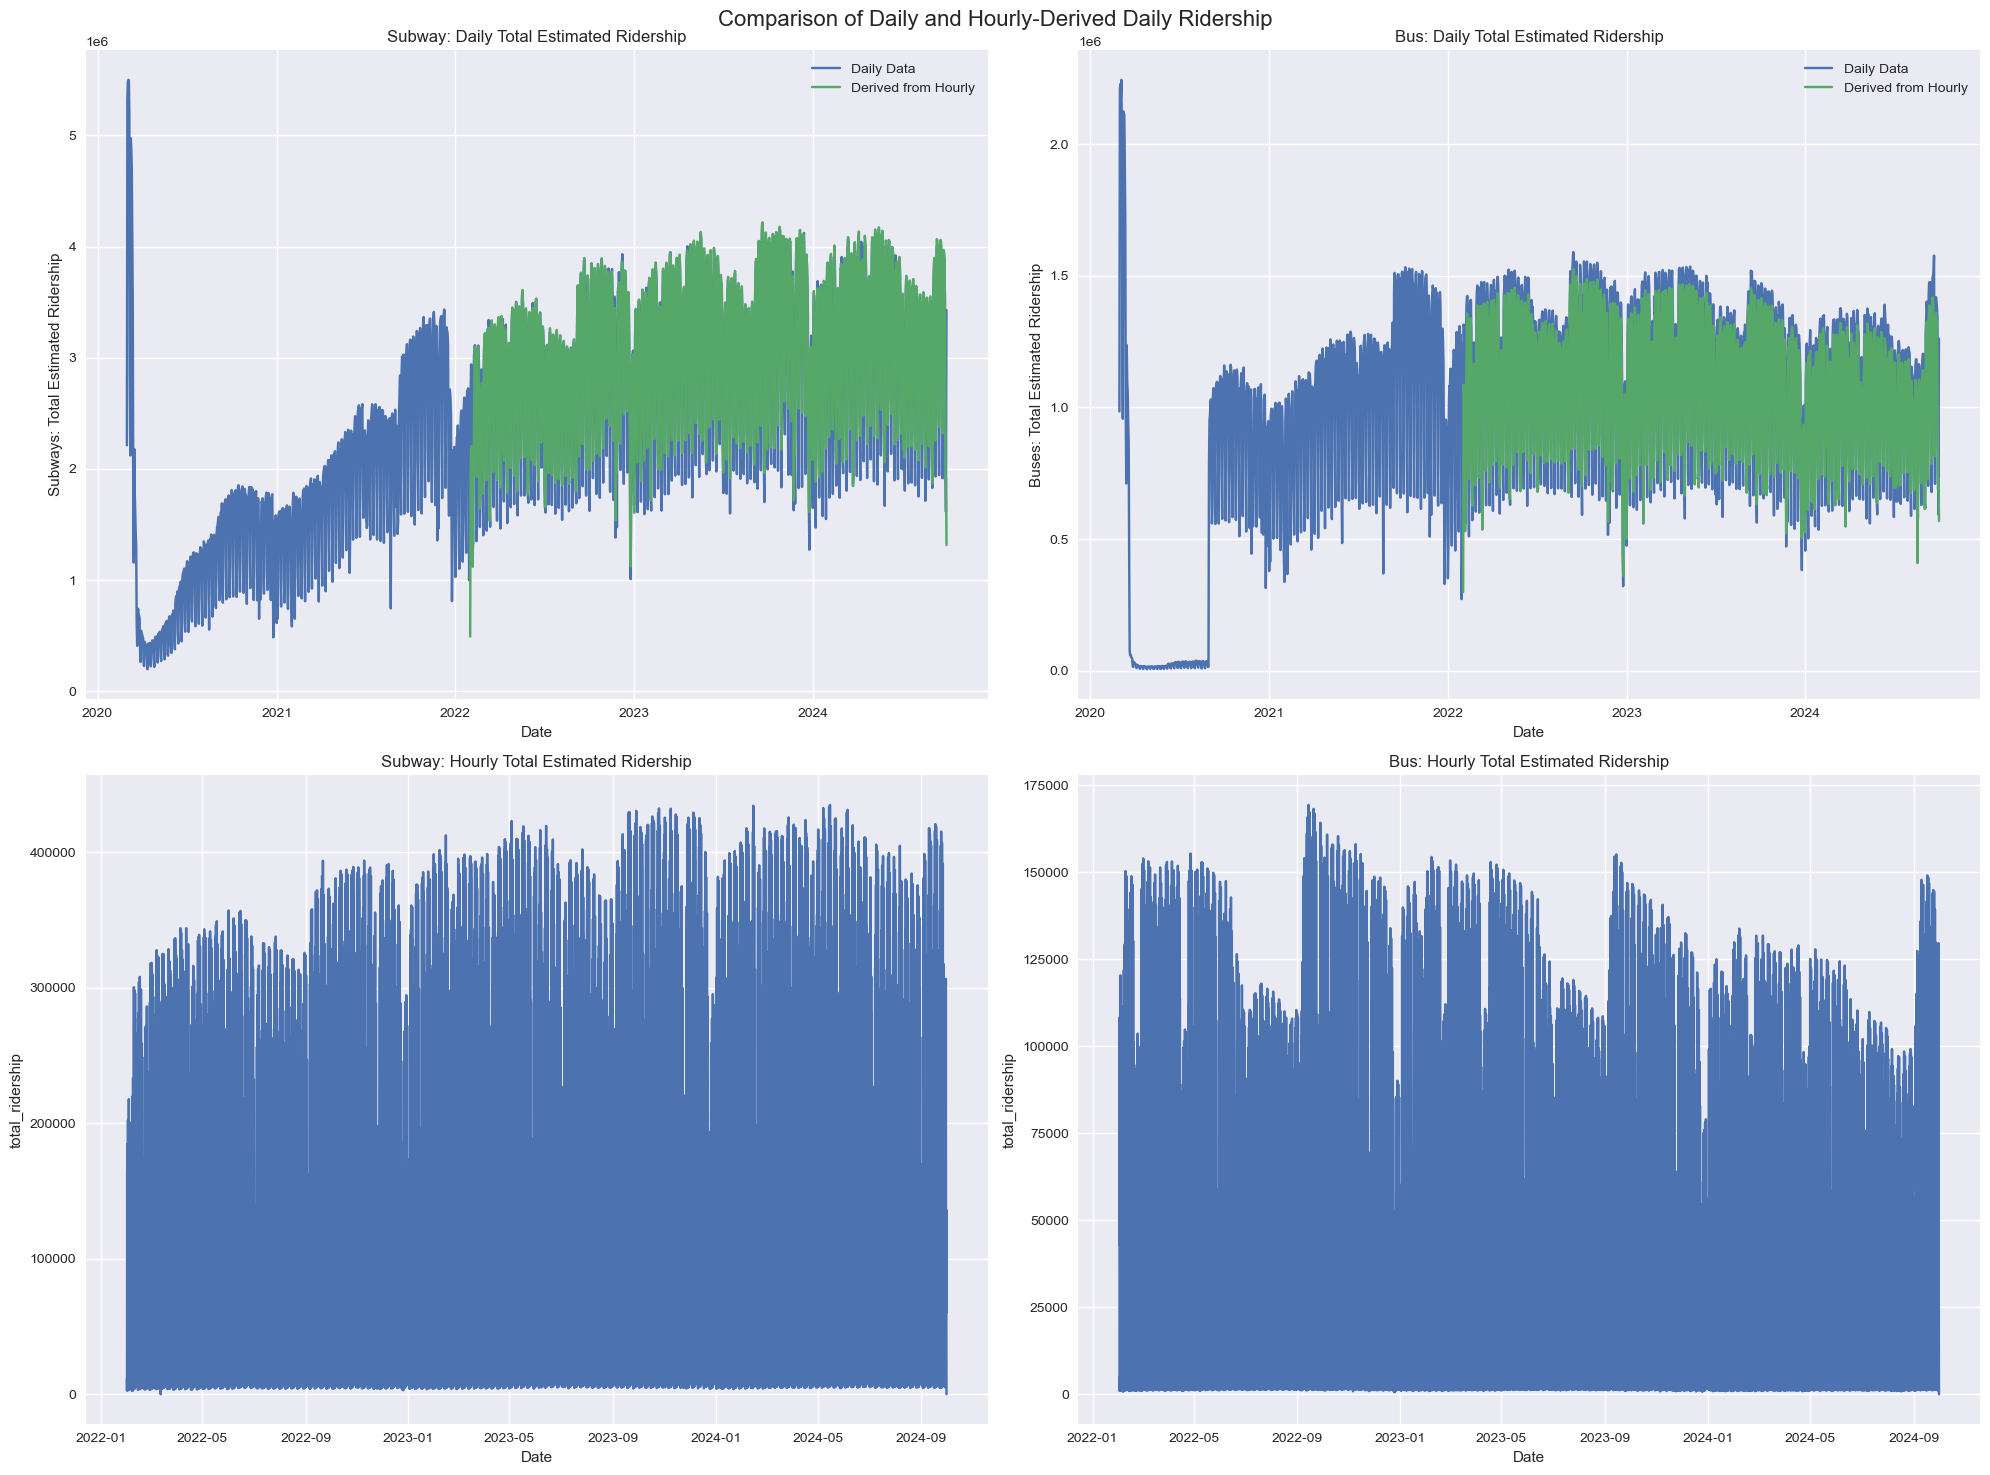

In [30]:
# Convert 'hour' column to datetime for hourly data and remove timezone info
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour']).dt.tz_localize(None)
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour']).dt.tz_localize(None)

# Ensure 'Date' column in daily_subway_df and daily_bus_df has no timezone info
daily_subway_df['Date'] = pd.to_datetime(daily_subway_df['Date']).dt.tz_localize(None)
daily_bus_df['Date'] = pd.to_datetime(daily_bus_df['Date']).dt.tz_localize(None)

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparison of Daily and Hourly-Derived Daily Ridership', fontsize=16)

# Plot for Subway
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0, 0], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_subway_df, ax=axs[0, 0], label='Derived from Hourly')
axs[0, 0].set_title('Subway: Daily Total Estimated Ridership')
axs[0, 0].set_xlabel('Date')
axs[0, 0].legend()

# Plot for Bus
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[0, 1], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_bus_df, ax=axs[0, 1], label='Derived from Hourly')
axs[0, 1].set_title('Bus: Daily Total Estimated Ridership')
axs[0, 1].set_xlabel('Date')
axs[0, 1].legend()

# Plot hourly data for Subway
sns.lineplot(x='hour', y='total_ridership', data=hourly_subway_df, ax=axs[1, 0])
axs[1, 0].set_title('Subway: Hourly Total Estimated Ridership')
axs[1, 0].set_xlabel('Date')

# Plot hourly data for Bus
sns.lineplot(x='hour', y='total_ridership', data=hourly_bus_df, ax=axs[1, 1])
axs[1, 1].set_title('Bus: Hourly Total Estimated Ridership')
axs[1, 1].set_xlabel('Date')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/2438362871.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


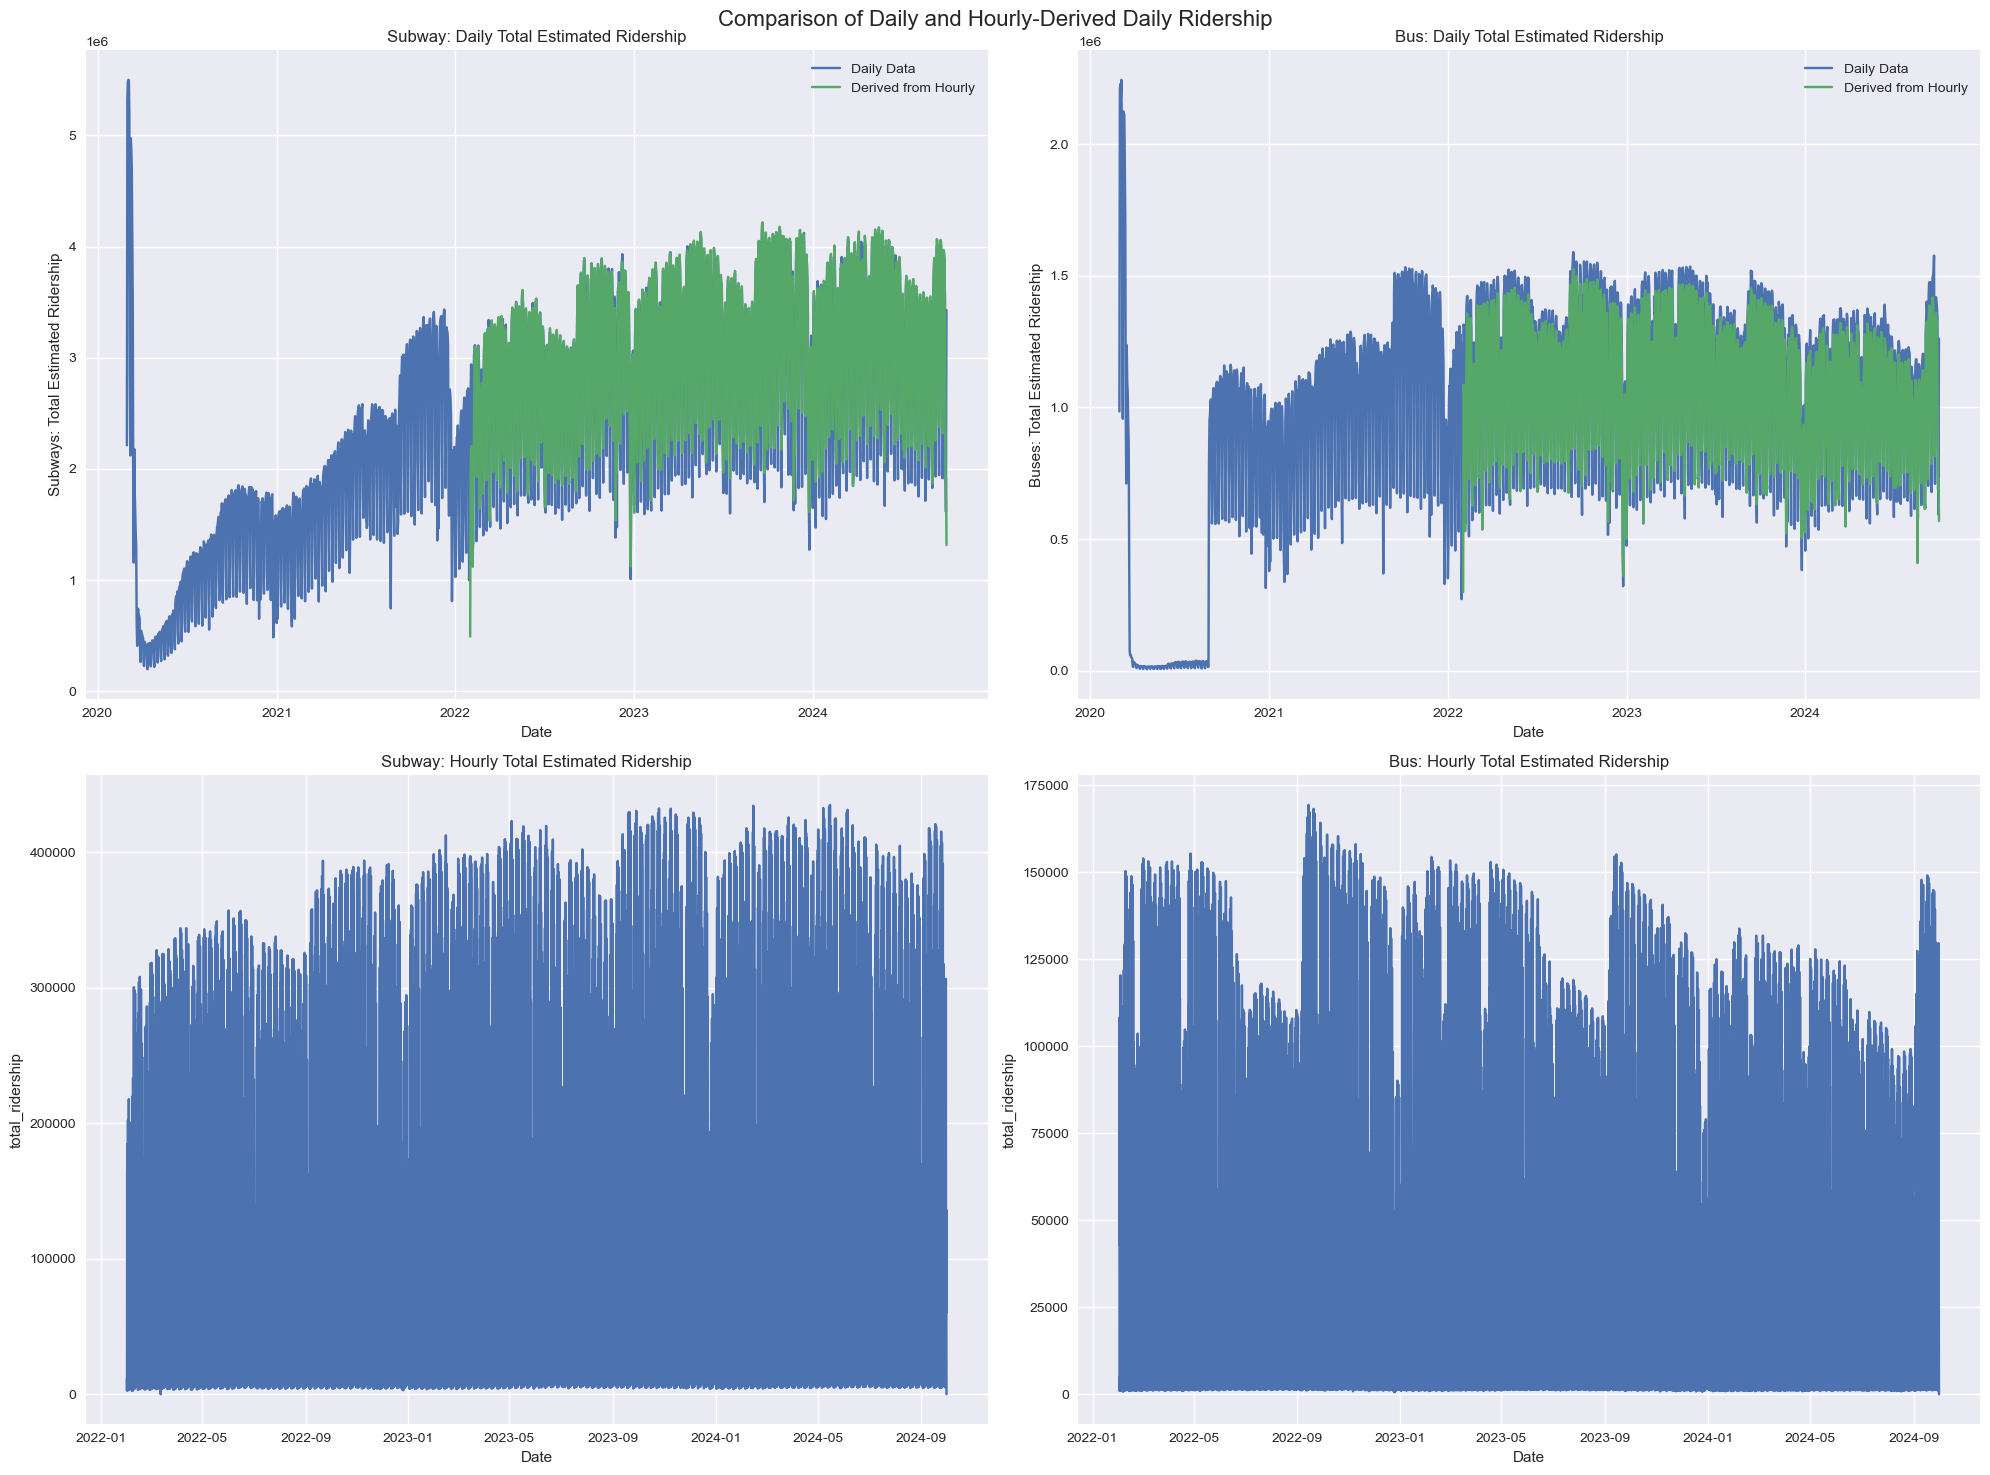

In [31]:
# Convert 'hour' column to datetime for hourly data and remove timezone info
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour']).dt.tz_localize(None)
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour']).dt.tz_localize(None)

# Ensure 'Date' column in daily_subway_df and daily_bus_df has no timezone info
daily_subway_df['Date'] = pd.to_datetime(daily_subway_df['Date']).dt.tz_localize(None)
daily_bus_df['Date'] = pd.to_datetime(daily_bus_df['Date']).dt.tz_localize(None)

# Convert 'Date' column in df to datetime without timezone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparison of Daily and Hourly-Derived Daily Ridership', fontsize=16)

# Plot for Subway
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0, 0], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_subway_df, ax=axs[0, 0], label='Derived from Hourly')
axs[0, 0].set_title('Subway: Daily Total Estimated Ridership')
axs[0, 0].set_xlabel('Date')
axs[0, 0].legend()

# Plot for Bus
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[0, 1], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_bus_df, ax=axs[0, 1], label='Derived from Hourly')
axs[0, 1].set_title('Bus: Daily Total Estimated Ridership')
axs[0, 1].set_xlabel('Date')
axs[0, 1].legend()

# Plot hourly data for Subway
sns.lineplot(x='hour', y='total_ridership', data=hourly_subway_df, ax=axs[1, 0])
axs[1, 0].set_title('Subway: Hourly Total Estimated Ridership')
axs[1, 0].set_xlabel('Date')

# Plot hourly data for Bus
sns.lineplot(x='hour', y='total_ridership', data=hourly_bus_df, ax=axs[1, 1])
axs[1, 1].set_title('Bus: Hourly Total Estimated Ridership')
axs[1, 1].set_xlabel('Date')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


20 biggest outliers for Subway Ridership - MSTL Decomposition:
Time: 2023-07-04 04:00:00, Residual: 198526.4752098823
Time: 2024-05-27 04:00:00, Residual: 197077.55723661947
Time: 2024-07-04 04:00:00, Residual: 175592.62933266995
Time: 2024-09-02 04:00:00, Residual: 172169.96342559406
Time: 2023-05-29 04:00:00, Residual: 170629.08714916854
Time: 2023-07-04 13:00:00, Residual: 169608.13150491167
Time: 2023-11-23 12:00:00, Residual: 169552.08555278994
Time: 2024-05-27 13:00:00, Residual: 168687.36670445045
Time: 2024-05-27 03:00:00, Residual: 167643.0513783147
Time: 2023-09-04 04:00:00, Residual: 159174.30598993236
Time: 2022-11-24 12:00:00, Residual: 158050.4496321222
Time: 2023-05-29 03:00:00, Residual: 155777.0589051308
Time: 2024-06-19 04:00:00, Residual: 154375.32964098983
Time: 2024-02-13 03:00:00, Residual: 154064.42825049767
Time: 2023-11-23 03:00:00, Residual: 154012.42012736242
Time: 2024-07-04 13:00:00, Residual: 149679.5442850996
Time: 2024-09-02 03:00:00, Residual: 148906.5

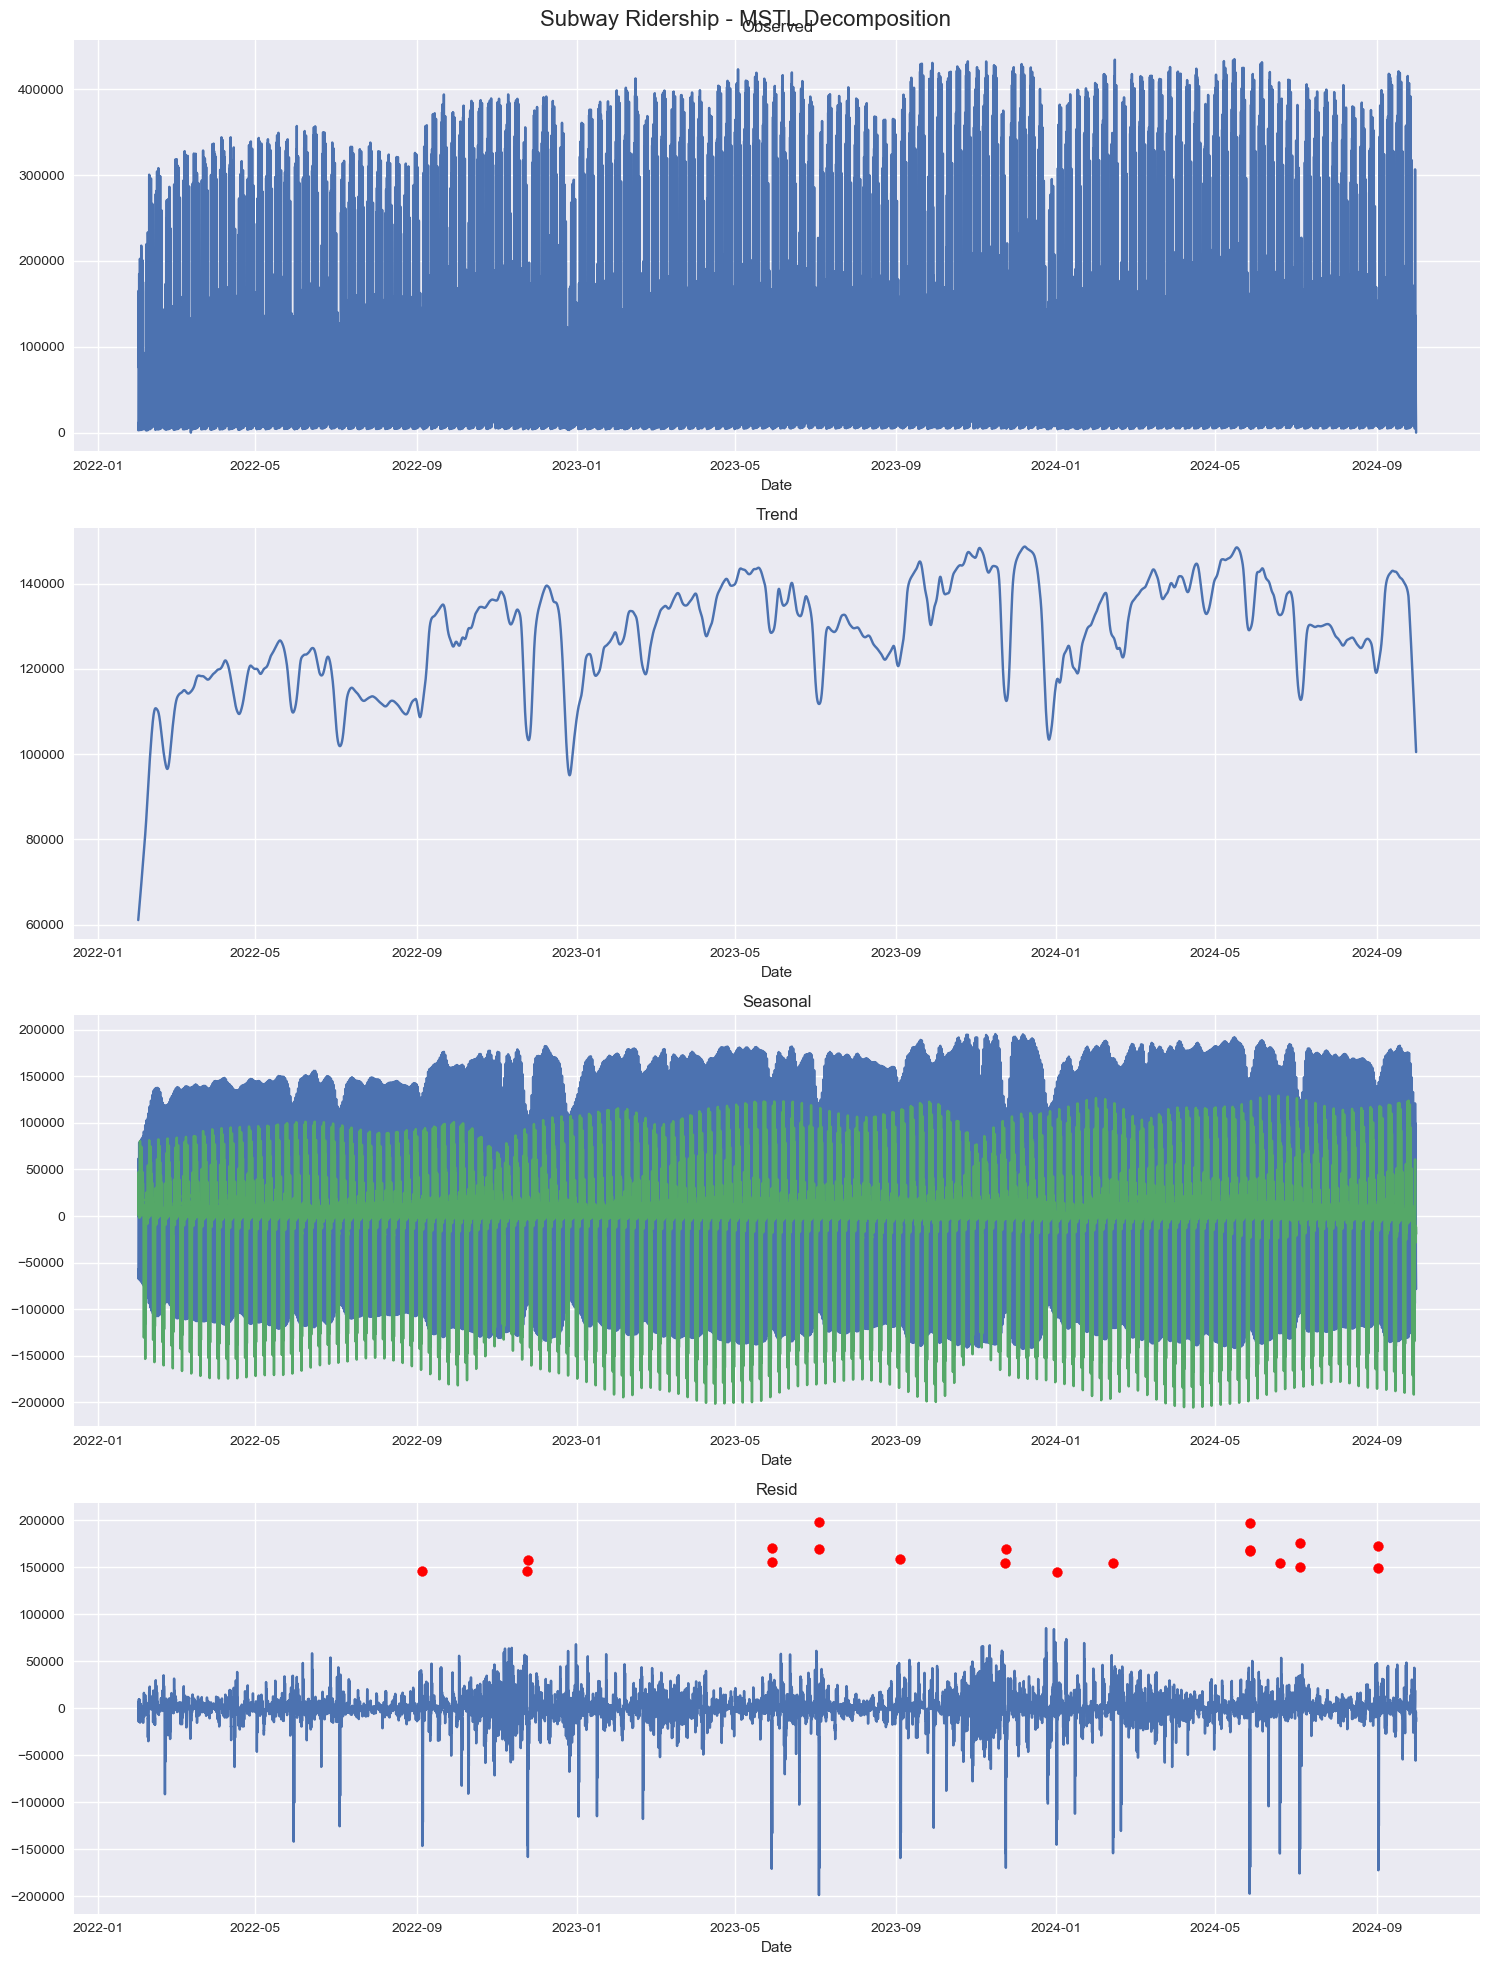


20 biggest outliers for Bus Ridership - MSTL Decomposition:
Time: 2023-05-29 03:00:00, Residual: 69570.01002272559
Time: 2022-05-30 03:00:00, Residual: 68657.32580020634
Time: 2022-11-24 02:00:00, Residual: 67851.80017541688
Time: 2024-05-27 03:00:00, Residual: 62287.81536529222
Time: 2024-09-02 03:00:00, Residual: 61115.92557846412
Time: 2023-07-04 03:00:00, Residual: 61046.62111771108
Time: 2022-09-05 03:00:00, Residual: 59203.163098626086
Time: 2023-11-23 02:00:00, Residual: 57941.191035451055
Time: 2022-11-24 03:00:00, Residual: 57017.59515415202
Time: 2023-07-04 04:00:00, Residual: 56157.31027993582
Time: 2023-09-04 03:00:00, Residual: 54280.947884939036
Time: 2023-05-29 04:00:00, Residual: 53720.22992842918
Time: 2022-05-30 04:00:00, Residual: 51945.88708245566
Time: 2022-10-10 03:00:00, Residual: 51631.484480159765
Time: 2024-05-27 04:00:00, Residual: 51039.69432296734
Time: 2023-11-23 03:00:00, Residual: 50754.87863225131
Time: 2023-01-02 02:00:00, Residual: 49733.95290666794


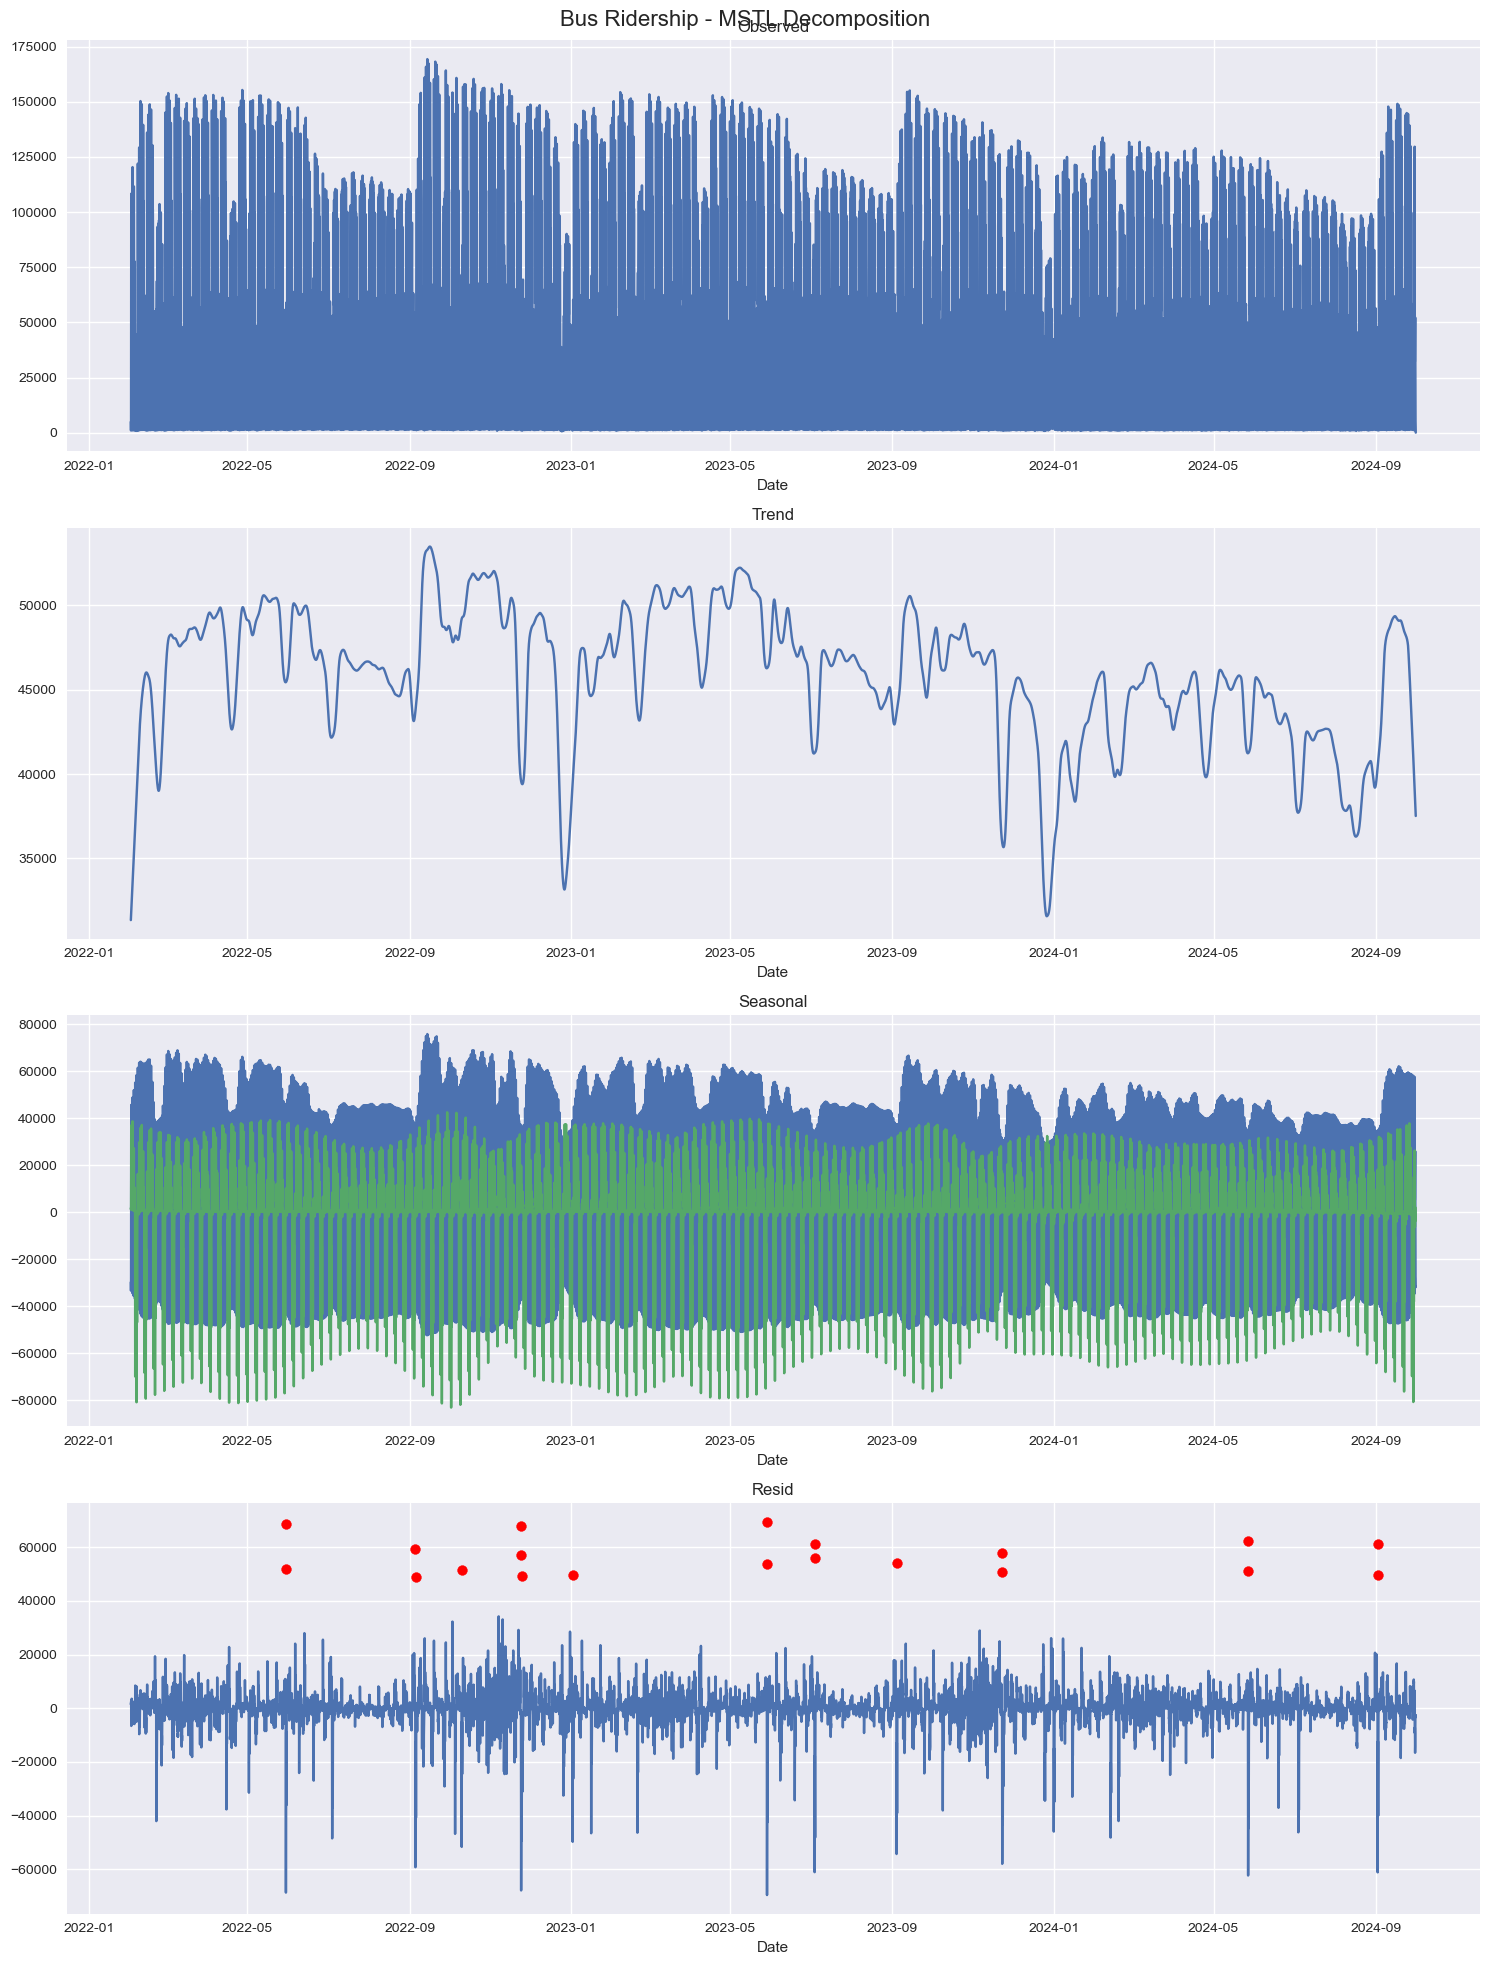

In [32]:
# Import required libraries
from statsmodels.tsa.seasonal import MSTL
import numpy as np

def perform_mstl(data, periods=[7, 365]):
    mstl = MSTL(data, periods=periods).fit()
    return mstl

# Perform MSTL decomposition for subway data
subway_decomposition = perform_mstl(hourly_subway_df['total_ridership'], periods=[24, 24*7])

# Perform MSTL decomposition for bus data
bus_decomposition = perform_mstl(hourly_bus_df['total_ridership'], periods=[24, 24*7])

# Plot the decomposition results
def plot_decomposition(decomposition, title, df):
    fig, axs = plt.subplots(4, 1, figsize=(15, 20))
    fig.suptitle(title, fontsize=16)
    
    components = ['observed', 'trend', 'seasonal', 'resid']
    
    for i, component in enumerate(components):
        axs[i].plot(df['hour'], getattr(decomposition, component))
        axs[i].set_title(component.capitalize())
        axs[i].set_xlabel('Date')
        
        if component == 'resid':
            # Find the 20 biggest outliers
            residuals = getattr(decomposition, component)
            outliers = np.abs(residuals).nlargest(20)
            
            # Plot the outliers as red dots
            axs[i].scatter(df['hour'].iloc[outliers.index], outliers, color='red', s=50)
            
            # Print the times of the outliers
            print(f"\n20 biggest outliers for {title}:")
            for time, value in zip(df['hour'].iloc[outliers.index], outliers):
                print(f"Time: {time}, Residual: {value}")
        
    plt.tight_layout()
    plt.show()

# Plot decomposition for subway data
plot_decomposition(subway_decomposition, 'Subway Ridership - MSTL Decomposition', hourly_subway_df)

# Plot decomposition for bus data
plot_decomposition(bus_decomposition, 'Bus Ridership - MSTL Decomposition', hourly_bus_df)


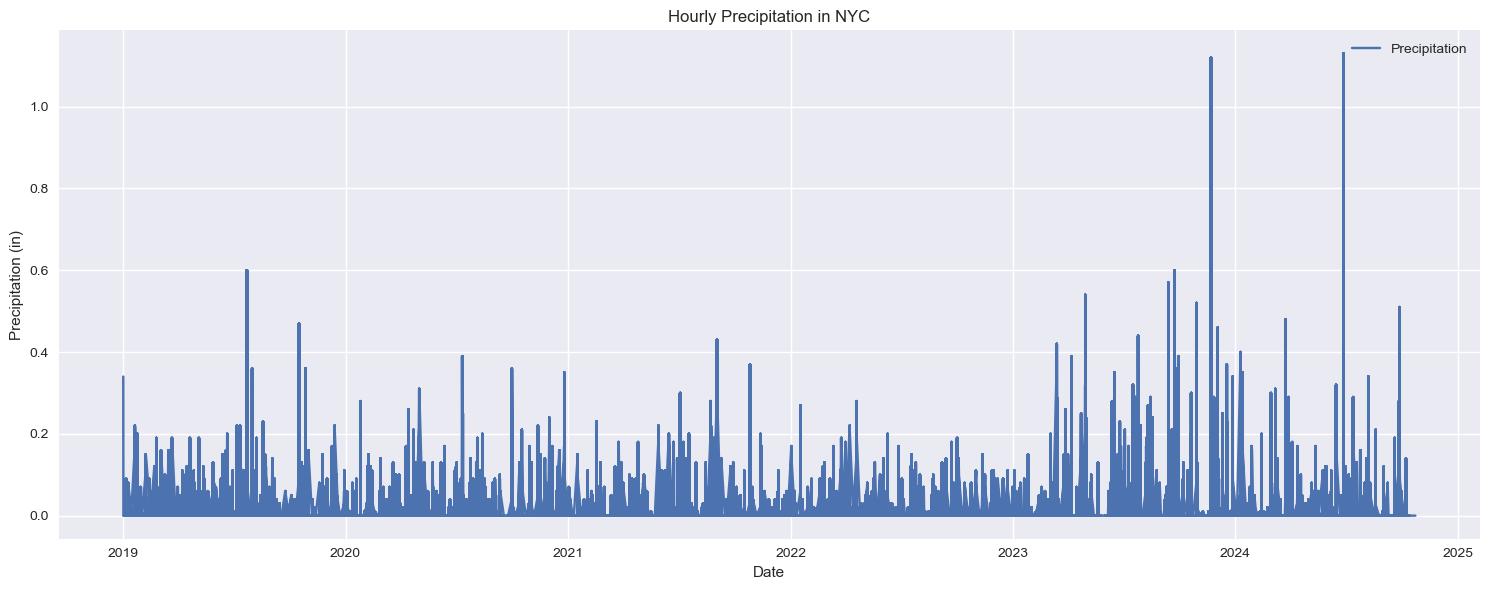

Weather data starts from: 2019-01-01 00:00:00
Number of hours in weather data: 355992
Number of hours in subway data after cutoff: 23349
Number of hours in bus data after cutoff: 23325

Updated Weather DataFrame:
                 time  temp_c  humidity  wind_kph  heat_index  wind_chill  \
0 2019-01-01 00:00:00     9.9        96      15.5       40.88    7.730417   
1 2019-01-01 01:00:00    10.5        95      15.6       41.15    8.460662   
2 2019-01-01 02:00:00    11.2        93      15.7       41.19    9.315478   
3 2019-01-01 03:00:00    11.8        92      19.9       41.46    9.656106   
4 2019-01-01 04:00:00    12.1        89      21.3       40.77    9.918505   

   discomfort_index  humidity_temperature_index  
0             5.102                       950.4  
1             5.715                       997.5  
2             6.391                      1041.6  
3             7.004                      1085.6  
4             7.193                      1076.9  


In [33]:
# Read in hourly weather data
weather_df = pd.read_csv('../assets/nyc_hourly_weather_2019_1_1.csv')
# weather_df = pd.read_csv('../assets/nyc_hourly_weather_2023_10_08.csv')

weather_df['time'] = pd.to_datetime(weather_df['time'])

# Calculate additional features
weather_df['heat_index'] = weather_df['temp_c'] + 0.33 * weather_df['humidity'] - 0.70
weather_df['wind_chill'] = 13.12 + 0.6215 * weather_df['temp_c'] - 11.37 * weather_df['wind_kph']**0.16 + 0.3965 * weather_df['temp_c'] * weather_df['wind_kph']**0.16
weather_df['discomfort_index'] = 0.5 * (weather_df['temp_c'] + 61.0 + ((weather_df['temp_c'] - 68.0) * 1.2) + (weather_df['humidity'] * 0.094))
weather_df['humidity_temperature_index'] = weather_df['humidity'] * weather_df['temp_c']

# Find the earliest datetime in the weather data
earliest_weather_datetime = weather_df['time'].min()

# Cutoff the hourly ridership data before the earliest hour in the weather data
hourly_subway_df = hourly_subway_df[hourly_subway_df['hour'] >= earliest_weather_datetime]
hourly_bus_df = hourly_bus_df[hourly_bus_df['hour'] >= earliest_weather_datetime]

# Plot the precipitation weather data over time
plt.figure(figsize=(15, 6))
plt.plot(weather_df['time'], weather_df['precip_in'], label='Precipitation')
plt.title('Hourly Precipitation in NYC')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some information about the data
print(f"Weather data starts from: {earliest_weather_datetime}")
print(f"Number of hours in weather data: {len(weather_df)}")
print(f"Number of hours in subway data after cutoff: {len(hourly_subway_df)}")
print(f"Number of hours in bus data after cutoff: {len(hourly_bus_df)}")

# Display the first few rows of the updated weather DataFrame
print("\nUpdated Weather DataFrame:")
print(weather_df[['time', 'temp_c', 'humidity', 'wind_kph', 'heat_index', 'wind_chill', 'discomfort_index', 'humidity_temperature_index']].head())

In [34]:
# Combine ridership data, residuals, and weather data into a single DataFrame
combined_df = pd.merge(
    hourly_subway_df[['hour', 'total_ridership']].rename(columns={'total_ridership': 'subway_ridership'}),
    pd.DataFrame({'hour': hourly_subway_df['hour'], 'subway_residual': subway_decomposition.resid}),
    on='hour'
)

combined_df = pd.merge(
    combined_df,
    hourly_bus_df[['hour', 'total_ridership']].rename(columns={'total_ridership': 'bus_ridership'}),
    on='hour'
)

combined_df = pd.merge(
    combined_df,
    pd.DataFrame({'hour': hourly_bus_df['hour'], 'bus_residual': bus_decomposition.resid}),
    on='hour'
)

combined_df = pd.merge(
    combined_df,
    weather_df,
    left_on='hour',
    right_on='time'
)

# Drop the redundant 'time' column
combined_df = combined_df.drop('time', axis=1)

# Add a 'season' column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_df['season'] = combined_df['hour'].dt.month.map(get_season)

# Add an 'is_weekend' column
combined_df['is_weekend'] = combined_df['hour'].dt.dayofweek.isin([5, 6]).astype(int)

# Display the first few rows of the combined DataFrame
print("\nCombined DataFrame:")
print(combined_df.head())

# Display basic information about the combined DataFrame
print("\nCombined DataFrame Info:")
print(combined_df.info())


Combined DataFrame:
                 hour  subway_ridership  subway_residual  bus_ridership  \
0 2022-02-01 19:00:00           11794.0       4338.29709    4910.510998   
1 2022-02-01 19:00:00           11794.0       4338.29709    4910.510998   
2 2022-02-01 19:00:00           11794.0       4338.29709    4910.510998   
3 2022-02-01 19:00:00           11794.0       4338.29709    4910.510998   
4 2022-02-01 19:00:00           11794.0       4338.29709    4910.510998   

   bus_residual        date  temp_c  temp_f  precip_mm  precip_in  ...  \
0    1559.07156  2022-02-01    -1.8    28.7        0.0        0.0  ...   
1    1559.07156  2022-02-01    -1.8    28.7        0.0        0.0  ...   
2    1559.07156  2022-02-01    -1.8    28.7        0.0        0.0  ...   
3    1559.07156  2022-02-01    -1.8    28.7        0.0        0.0  ...   
4    1559.07156  2022-02-01    -1.8    28.7        0.0        0.0  ...   

   gust_kph  gust_mph  condition_text condition_code  heat_index  wind_chill  \
0  

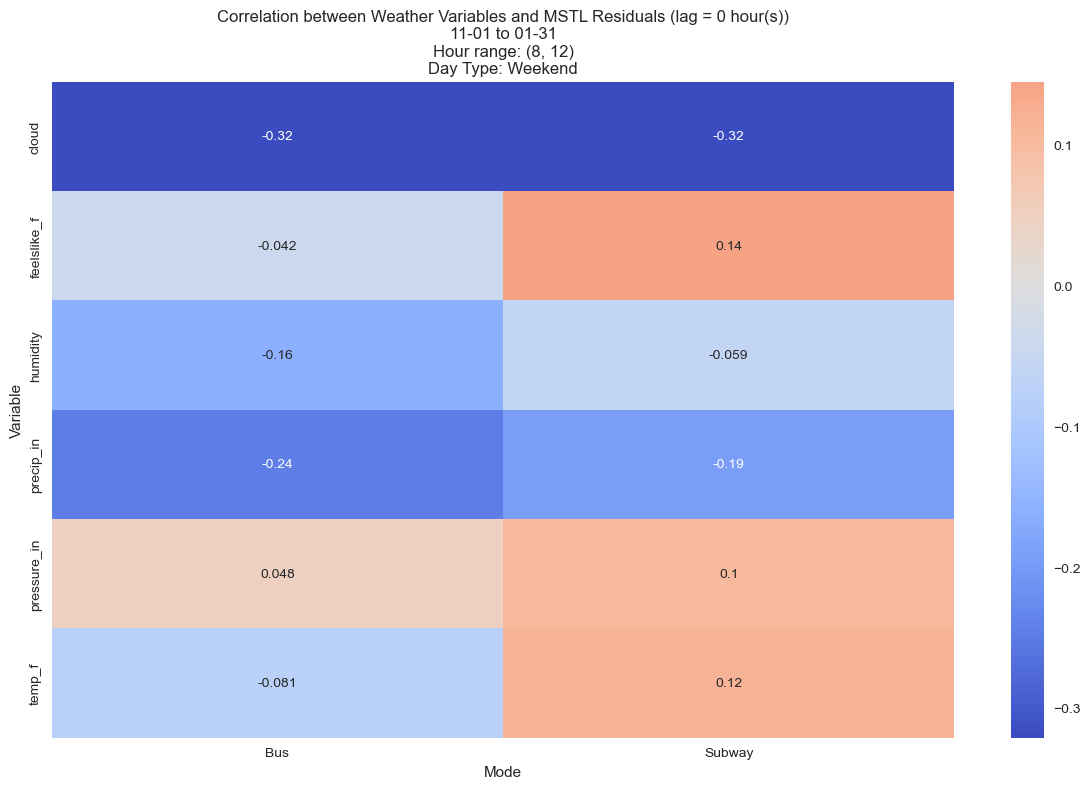

      Mode Day Type Season Hour Segment Season_Hour     Variable  Correlation
0   Subway  Weekend   Fall        08-12  Fall_08-12       temp_f     0.117094
1   Subway  Weekend   Fall        08-12  Fall_08-12    precip_in    -0.191935
2   Subway  Weekend   Fall        08-12  Fall_08-12     humidity    -0.058510
3   Subway  Weekend   Fall        08-12  Fall_08-12  pressure_in     0.103474
4   Subway  Weekend   Fall        08-12  Fall_08-12        cloud    -0.320164
5   Subway  Weekend   Fall        08-12  Fall_08-12  feelslike_f     0.144686
6      Bus  Weekend   Fall        08-12  Fall_08-12       temp_f    -0.080868
7      Bus  Weekend   Fall        08-12  Fall_08-12    precip_in    -0.244980
8      Bus  Weekend   Fall        08-12  Fall_08-12     humidity    -0.160045
9      Bus  Weekend   Fall        08-12  Fall_08-12  pressure_in     0.047924
10     Bus  Weekend   Fall        08-12  Fall_08-12        cloud    -0.321110
11     Bus  Weekend   Fall        08-12  Fall_08-12  feelslike_f

In [35]:
def analyze_weather_impact(combined_df, lag=0, start_date=None, end_date=None, hour_range=None, is_weekend=None, plot=False):
    # Shift weather data by the specified lag
    combined_df_lagged = combined_df.copy()
    combined_df_lagged['hour'] = combined_df_lagged['hour'] + pd.Timedelta(hours=lag)

    # Filter data for the specified date range
    if start_date and end_date:
        start_month, start_day = map(int, start_date.split('-'))
        end_month, end_day = map(int, end_date.split('-'))
        
        def is_date_in_range(date):
            month, day = date.month, date.day
            if start_month <= end_month:
                return (start_month, start_day) <= (month, day) <= (end_month, end_day)
            else:
                return (month, day) >= (start_month, start_day) or (month, day) <= (end_month, end_day)
        
        combined_df_lagged = combined_df_lagged[combined_df_lagged['hour'].apply(is_date_in_range)]

    # Filter data for the specified hour range
    if hour_range:
        if isinstance(hour_range, int):
            combined_df_lagged = combined_df_lagged[combined_df_lagged['hour'].dt.hour == hour_range]
        elif isinstance(hour_range, tuple) and len(hour_range) == 2:
            start_hour, end_hour = hour_range
            combined_df_lagged = combined_df_lagged[(combined_df_lagged['hour'].dt.hour >= start_hour) & (combined_df_lagged['hour'].dt.hour < end_hour)]

    # Filter data for weekday/weekend
    if is_weekend is not None:
        combined_df_lagged = combined_df_lagged[combined_df_lagged['is_weekend'] == is_weekend]

    # List of weather variables to analyze
    weather_vars = ['temp_f', 'precip_in', 'humidity',
                    'pressure_in', 'cloud',
                    'feelslike_f']

    results = []
    for mode in ['subway', 'bus']:
        correlations = combined_df_lagged[weather_vars + [f'{mode}_residual']].corr()[f'{mode}_residual'].drop(f'{mode}_residual')
        for var, corr in correlations.items():
            results.append({
                'Mode': mode.capitalize(),
                'Day Type': 'Weekend' if is_weekend else 'Weekday',
                'Season': combined_df_lagged['season'].iloc[0],
                'Hour Segment': f'{hour_range[0]:02d}-{hour_range[1]:02d}',
                'Season_Hour': f'{combined_df_lagged["season"].iloc[0]}_{hour_range[0]:02d}-{hour_range[1]:02d}',
                'Variable': var,
                'Correlation': corr
            })

    correlation_df = pd.DataFrame(results)

    # Visualization code 
    if plot:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_df.pivot(index='Variable', columns='Mode', values='Correlation'), 
                    annot=True, cmap='coolwarm', center=0)
        title = f'Correlation between Weather Variables and MSTL Residuals (lag = {lag} hour(s))'
        if start_date and end_date:
            title += f'\n{start_date} to {end_date}'
        if hour_range:
            title += f'\nHour range: {hour_range}'
        title += f'\nDay Type: {"Weekend" if is_weekend else "Weekday"}'
        plt.title(title)
        plt.tight_layout()
        plt.show()

    return correlation_df

# Example usage:
start_date = '11-01'
end_date = '01-31'
hours = (8, 12)
is_weekend = True

result_df = analyze_weather_impact(combined_df, lag=0, start_date=start_date, end_date=end_date, 
                                   hour_range=hours, is_weekend=is_weekend, plot=True)

print(result_df)

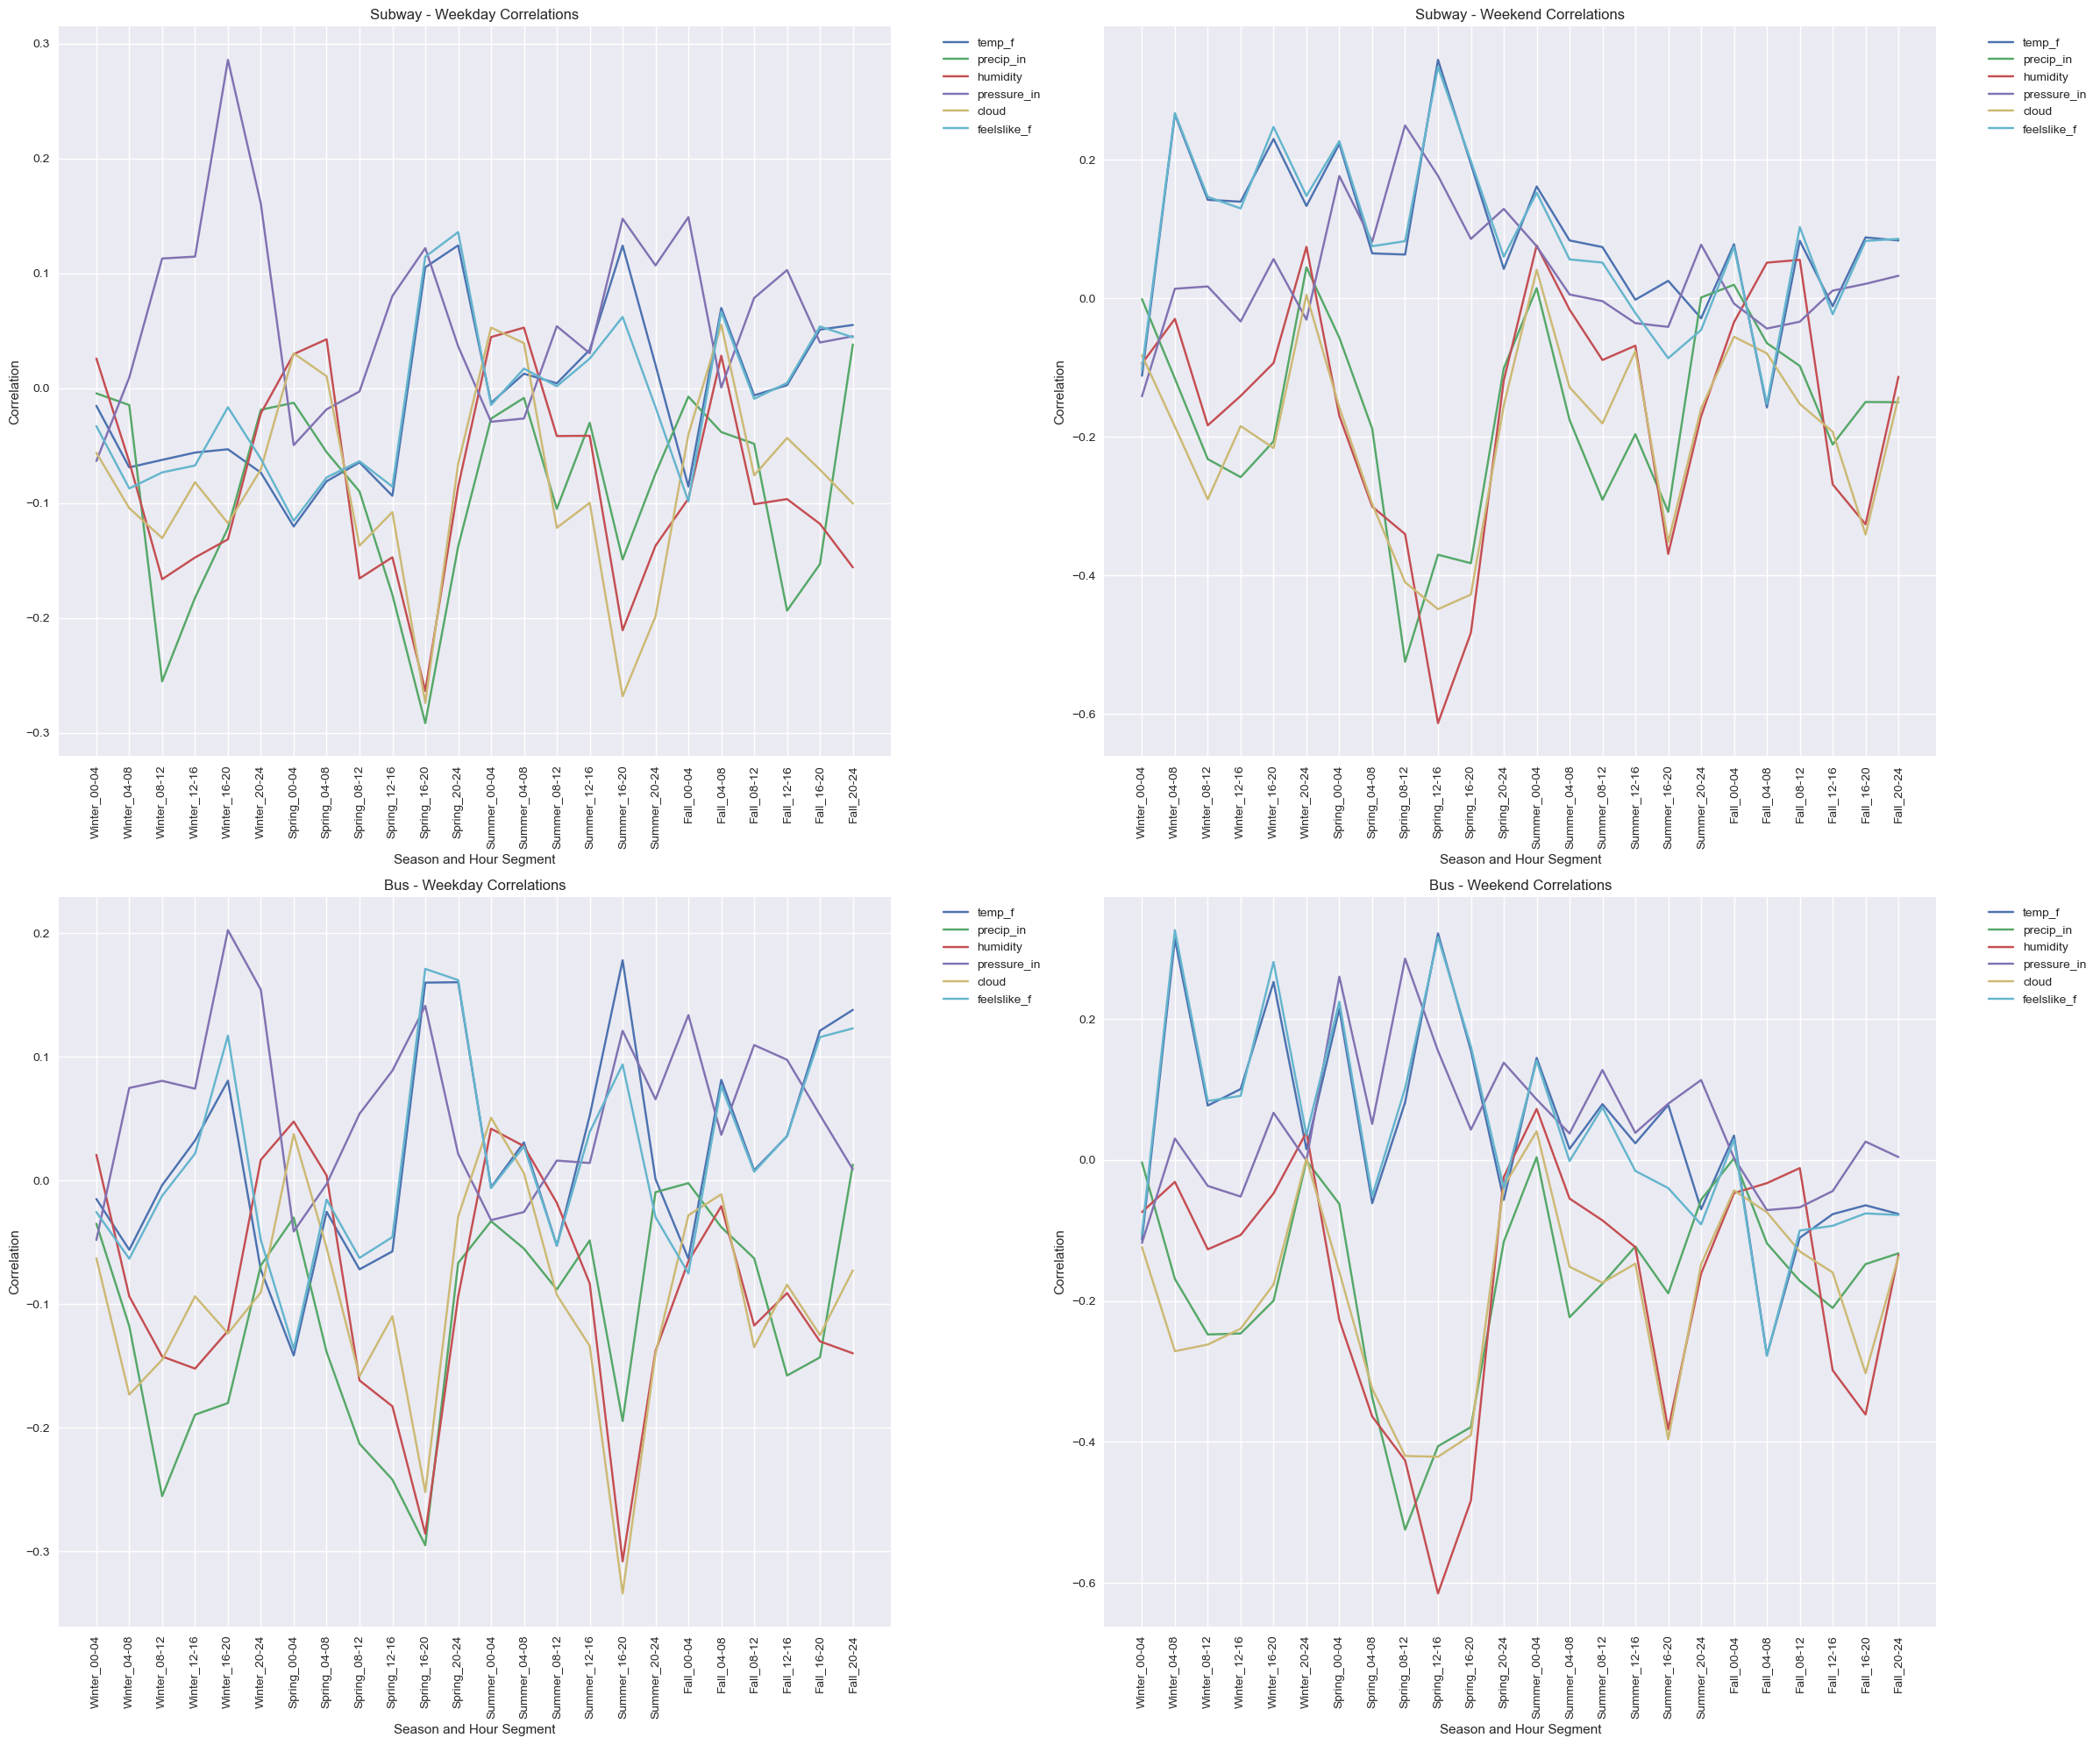

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/925324929.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/925324929.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/925324929.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/925324929.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/925324929.py:77: UserWarning: FixedFormatter should only be used together with FixedLoca

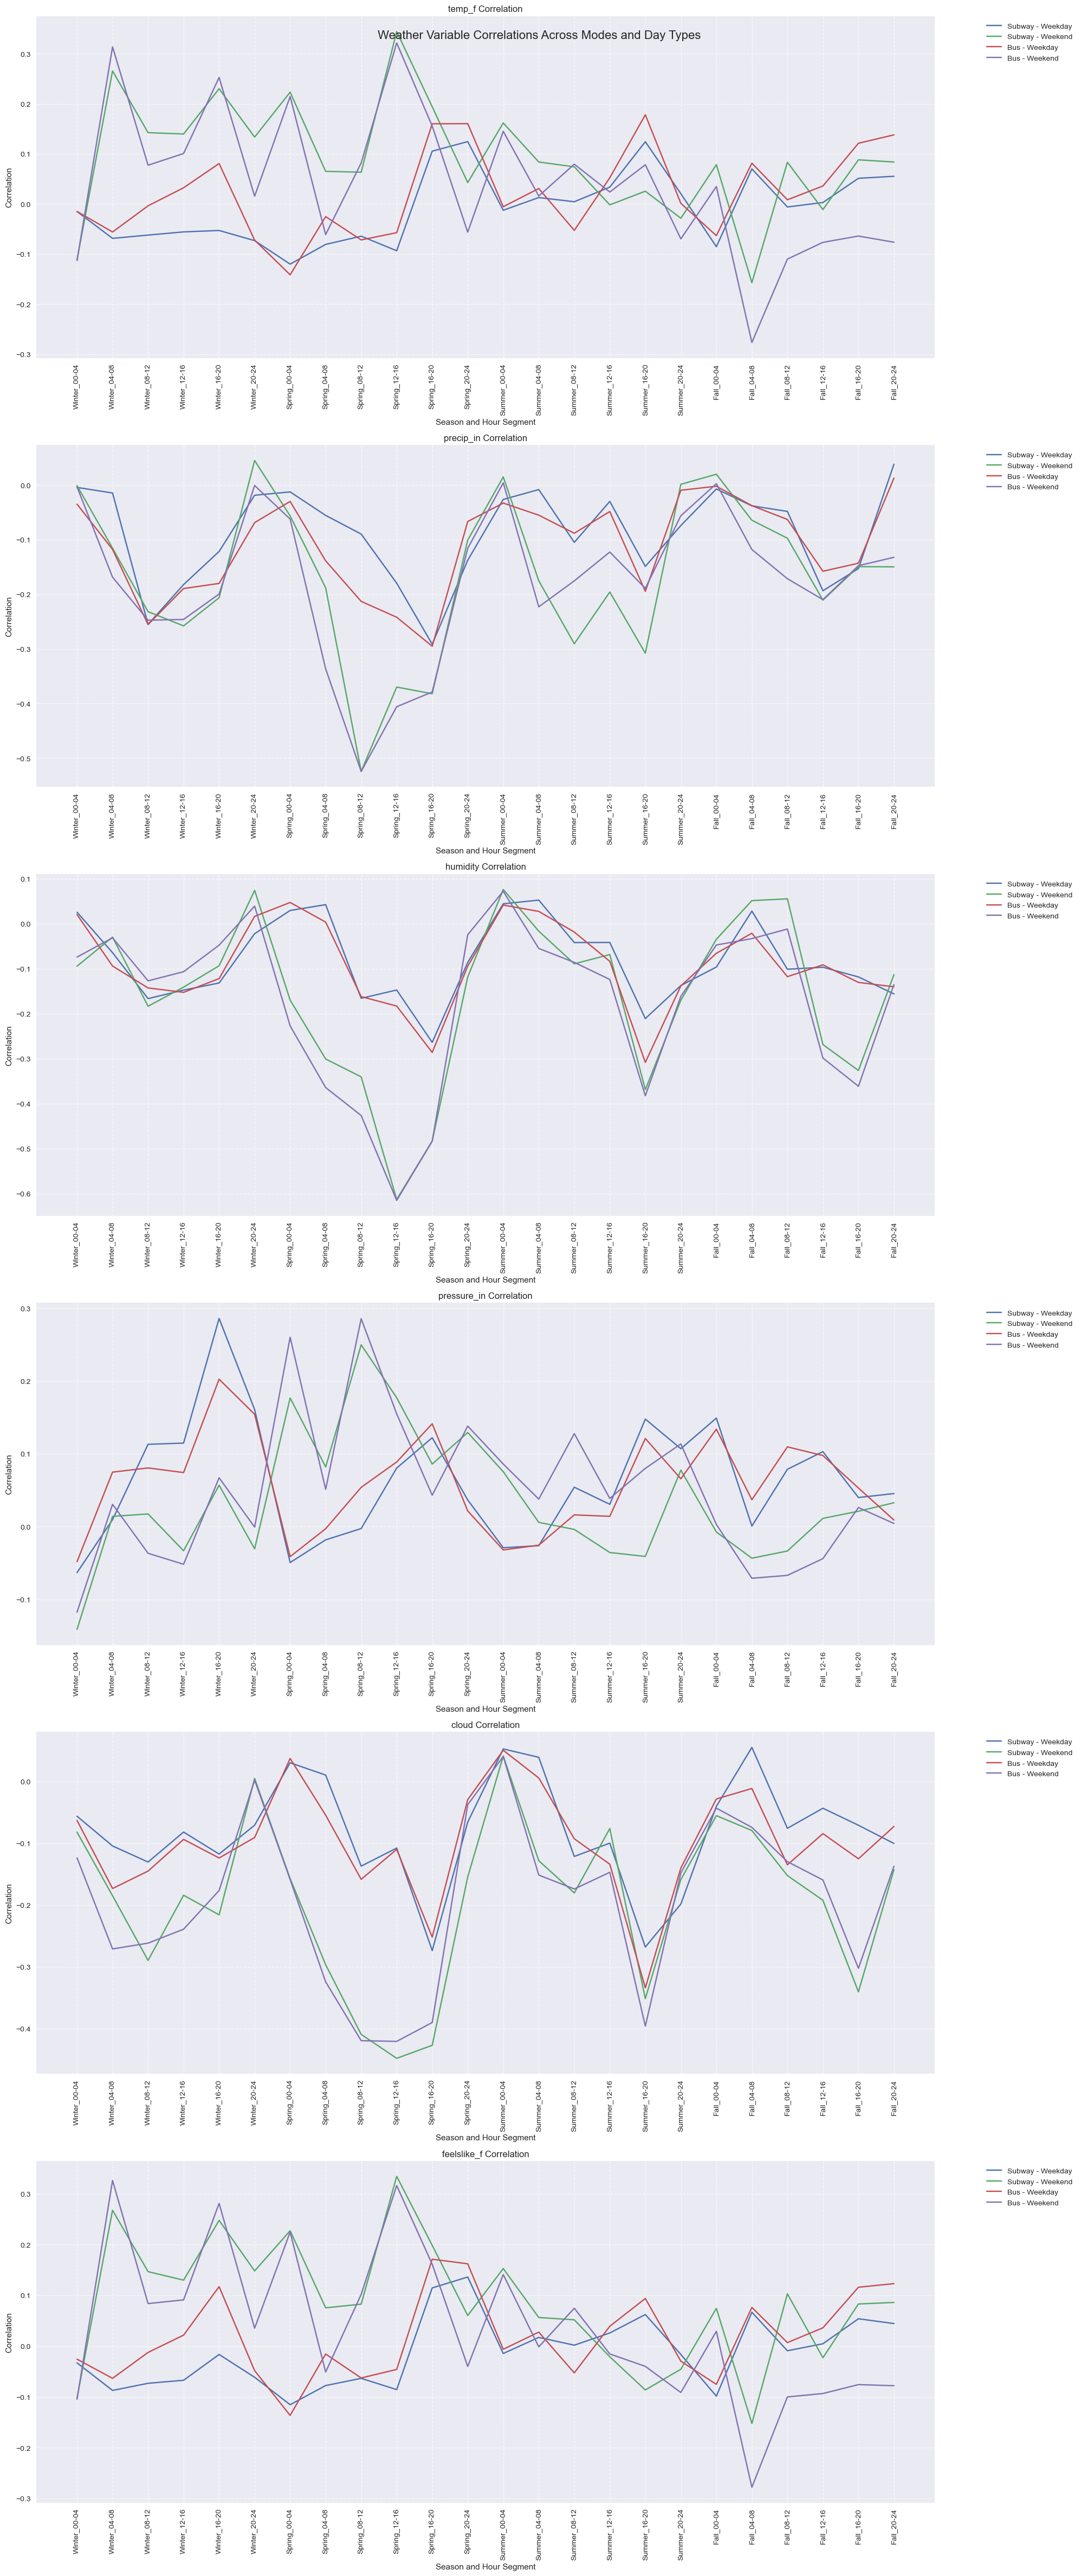

                                                 count      mean  std  \
Mode   Day Type Season Hour Segment Variable                            
Bus    Weekday  Fall   00-04        cloud          1.0 -0.028156  NaN   
                                    feelslike_f    1.0 -0.075174  NaN   
                                    humidity       1.0 -0.065402  NaN   
                                    precip_in      1.0 -0.002146  NaN   
                                    pressure_in    1.0  0.133858  NaN   
...                                                ...       ...  ...   
Subway Weekend  Winter 20-24        feelslike_f    1.0  0.148064  NaN   
                                    humidity       1.0  0.074542  NaN   
                                    precip_in      1.0  0.044985  NaN   
                                    pressure_in    1.0 -0.030554  NaN   
                                    temp_f         1.0  0.133507  NaN   

                                                  

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_all_conditions(combined_df, lag=0):
    seasons = [('Winter', '12-01', '02-28'), ('Spring', '03-01', '05-31'),
               ('Summer', '06-01', '08-31'), ('Fall', '09-01', '11-30')]
    hour_segments = [(0, 4), (4, 8), (8, 12), (12, 16), (16, 20), (20, 24)]
    day_types = [('Weekday', False), ('Weekend', True)]

    all_results = []

    for season, start_date, end_date in seasons:
        for start_hour, end_hour in hour_segments:
            for day_type, is_weekend in day_types:
                result_df = analyze_weather_impact(
                    combined_df,
                    lag=lag, start_date=start_date, end_date=end_date,
                    hour_range=(start_hour, end_hour), is_weekend=is_weekend,
                    plot=False
                )
                
                result_df['Season'] = season
                result_df['Hour Segment'] = f'{start_hour:02d}-{end_hour:02d}'
                result_df['Season_Hour'] = f'{season}_{start_hour:02d}-{end_hour:02d}'
                result_df['Day Type'] = day_type
                
                all_results.append(result_df)

    return pd.concat(all_results, ignore_index=True)

# Calculate correlations
correlations_df = analyze_all_conditions(combined_df, lag=0)

# Plotting
plt.figure(figsize=(24, 20))
for mode in ['Subway', 'Bus']:
    for i, day_type in enumerate(['Weekday', 'Weekend']):
        plt.subplot(2, 2, i + 1 if mode == 'Subway' else i + 3)
        data = correlations_df[(correlations_df['Mode'] == mode) & (correlations_df['Day Type'] == day_type)]
        sns.lineplot(data=data, x='Season_Hour', y='Correlation', hue='Variable', 
                     markers=True, dashes=False, errorbar=None)
        plt.title(f'{mode} - {day_type} Correlations')
        plt.xlabel('Season and Hour Segment')
        plt.ylabel('Correlation')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Get unique variables
variables = correlations_df['Variable'].unique()

# Set up the plot
fig, axs = plt.subplots(len(variables), 1, figsize=(20, 8*len(variables)))
fig.suptitle('Weather Variable Correlations Across Modes and Day Types', fontsize=16)

# Plot each variable
for i, variable in enumerate(variables):
    ax = axs[i] if len(variables) > 1 else axs
    
    for mode in ['Subway', 'Bus']:
        for day_type in ['Weekday', 'Weekend']:
            data = correlations_df[(correlations_df['Mode'] == mode) & 
                                   (correlations_df['Day Type'] == day_type) & 
                                   (correlations_df['Variable'] == variable)]
            
            sns.lineplot(data=data, x='Season_Hour', y='Correlation', 
                         label=f'{mode} - {day_type}',
                         markers=True, dashes=False, ax=ax)
    
    ax.set_title(f'{variable} Correlation')
    ax.set_xlabel('Season and Hour Segment')
    ax.set_ylabel('Correlation')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Display summary statistics
print(correlations_df.groupby(['Mode', 'Day Type', 'Season', 'Hour Segment', 'Variable'])['Correlation'].describe())

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_7228/1808644705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['hour_segment'] = pd.cut(weekend_data['hour'].dt.hour,


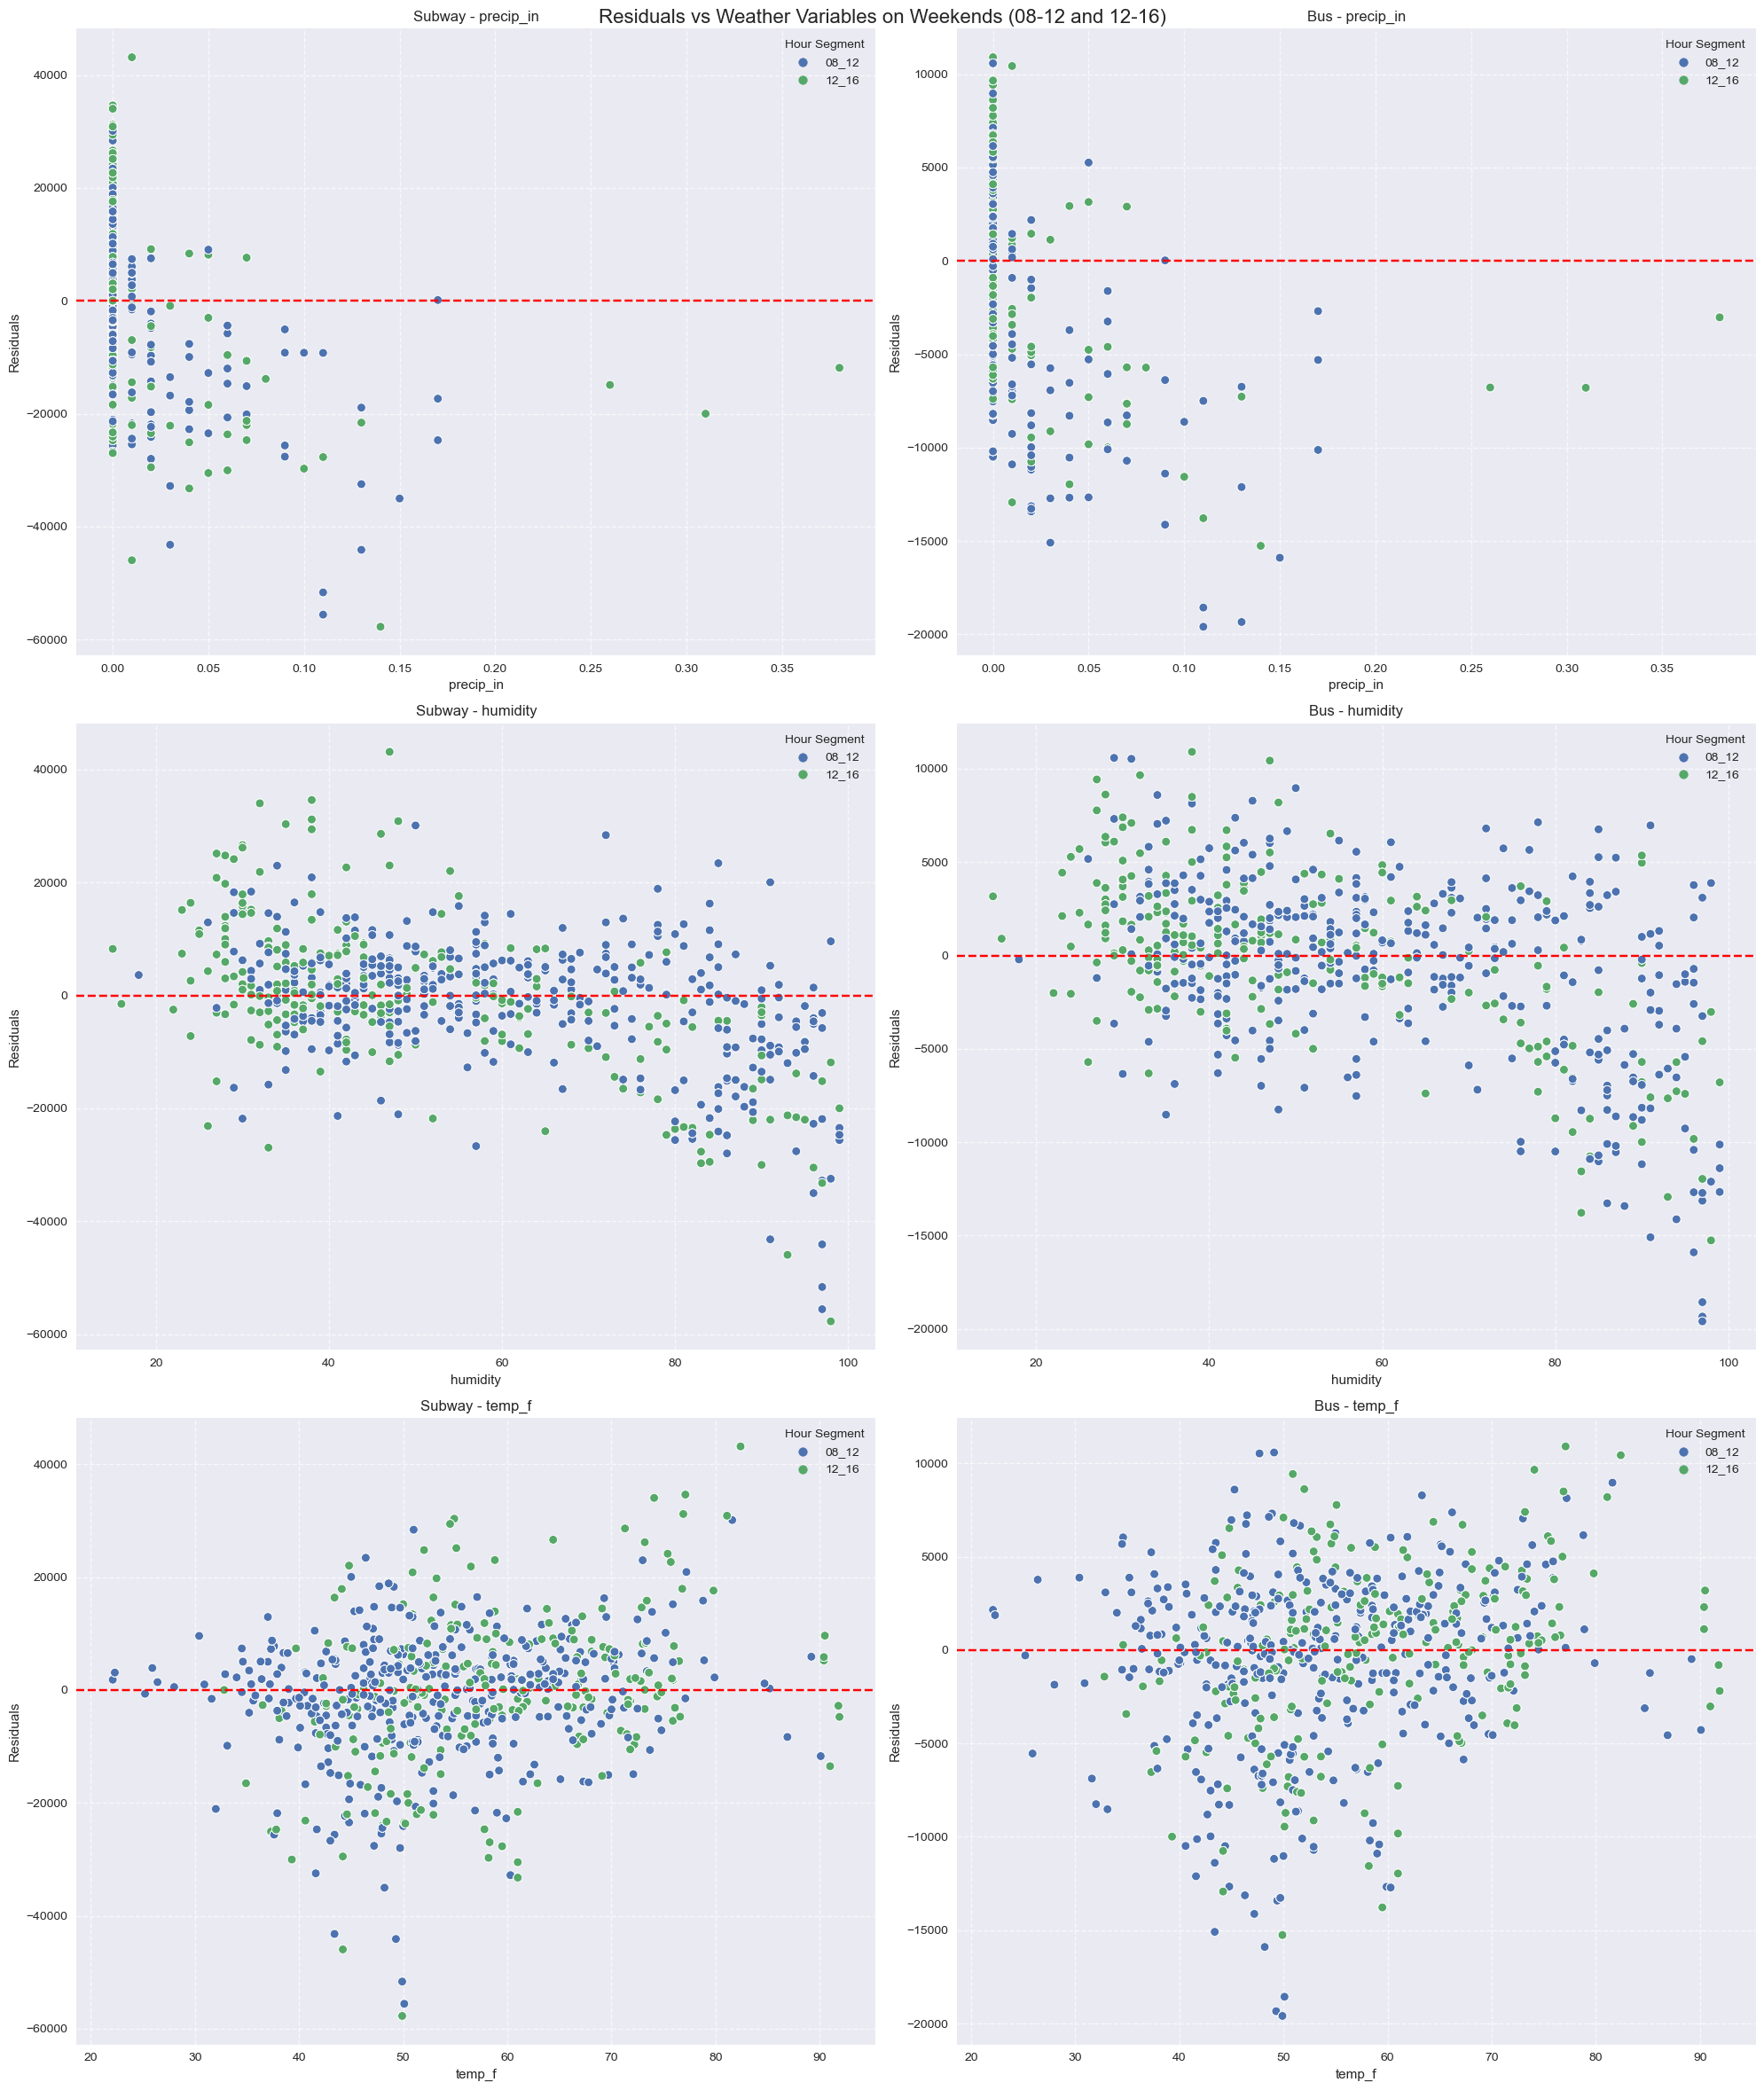

In [48]:
# Filter data for weekends and specified hour segments
weekend_data = combined_df[(combined_df['is_weekend'] == 1) & 
                           ((combined_df['hour'].dt.hour >= 8) & (combined_df['hour'].dt.hour < 16)) & (combined_df['season'] == 'Spring')]


# Create hour_segment column
weekend_data['hour_segment'] = pd.cut(weekend_data['hour'].dt.hour, 
                                      bins=[8, 12, 16], 
                                      labels=['08_12', '12_16'], 
                                      include_lowest=True)

# Set up the plot
fig, axs = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('Residuals vs Weather Variables on Weekends (08-12 and 12-16)', fontsize=16)

weather_vars = ['precip_in', 'humidity', 'temp_f']
modes = ['subway', 'bus']

for i, var in enumerate(weather_vars):
    for j, mode in enumerate(modes):
        ax = axs[i, j]
        
        # Calculate residuals
        residuals = weekend_data[f'{mode}_residual']
        
        # Create scatter plot
        sns.scatterplot(x=weekend_data[var], y=residuals, hue=weekend_data['hour_segment'], ax=ax)
        
        ax.set_title(f'{mode.capitalize()} - {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Residuals')
        ax.legend(title='Hour Segment')
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Add a horizontal line at y=0
        ax.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()